In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

# Content
     1. Changing Data Types
     2. Train Test Split
     3. Missing Value Analysis
     4. Feature Selection
         4.1. Mutual Information
         4.2. Correlation
         4.3. Variance Inflation Factor
     5. Outlier Treatment
     6. Feature Scaling
     7. Feature Transformation
     8. Test Transformation
     9. Linear Regression Model
    10. Random Forest Model
    11. Neural Network Model


# Names of dataframes:
       data = original dataframe with all features
       x - dataframe containing only predictors from the original dataframe (data)
       y - dataframe containing a target variable (NPV)  from the original dataframe (data)
       x_train, x_test - dataframe after splitting x dataframe for training and test purposes
       y_train, y_test - dataframe after splitting y dataframe for training and test purposes
       train_data - dataframe merging x_train and y_train dataframes
       test_data - dataframe merging x_test and y_test dataframes
       x_train_droped - copy of x_train without highly correlated predictors
       x_test_droped - copy of x_test without highly correlated predictors
       train_data_droped - copy of train_data without highly correlated predictors
       test_data_droped - copy of test_data without highly correlated predictors
       train_data_scaled - dateframe of train_data_droped after applying feature scaling
       test_data_scaled - dateframe of test_data_droped after applying feature scaling
       train_data_transformed - dataframe of train_data_scaled after tranformation
       test_data_transformed - dataframe of test_data_scaled after tranformation
       
       x_train_lr, y_train_lr, x_test_lr, y_test_lr - dataframes used for Linear Regression after feature engineering
       y_predicted_test_lr, y_predicted_train_lr - dataframes containing predicted values from Linear Regression model
       
       x_train_rf, y_train_rf, x_test_rf, y_test_rf - dataframes used for Random Forest
       y_predicted_test_rf, y_predicted_train_rf - dataframes containing predicted values from Random Forest model
       
       x_train_nn, y_train_nn, x_test_nn, y_test_nn - dataframes used for Neural Network after feature engineering
       y_predicted_test_nn, y_predicted_train_nn - dataframes containing predicted values from Neural Network model
       
       
       test_results_xx, train_results_xx - dataframe containing actual and predicted values of target variable 



##### Original dataframe with all features

In [3]:
data=pd.read_excel("new-data.xlsx")
data= data.drop([0,1], axis=0)
data= data.reset_index(drop = True)
data= data.apply(pd.to_numeric)
data.columns=data.columns.str.replace(" ","_").str.strip("_?")
data.head()

Thickness  Porosity_Matrix  Porosity_Fracture  Permeability_Matrix  \
0  255.423551         5.397494           1.093591             0.000099   
1  277.158579         6.966949           1.397529             0.000070   
2  287.007006         9.190668           0.788829             0.000072   
3  231.408002         9.093373           1.014729             0.000099   
4  117.900590         7.791357           1.083855             0.000013   

   Permeability_Fracture  Natural_Fracture_Spacing  \
0               0.000619                  2.886401   
1               0.000762                  2.755511   
2               0.001059                  2.215745   
3               0.000642                  2.317030   
4               0.000449                  2.225169   

   Water_Saturation_in_Matrix  Lagmuir_Volume_of_CH4  Lagmuir_Pressure_of_CH4  \
0                   12.136014             171.039519               408.082719   
1                   11.859933             217.840847               724.404699   
2                    6.507487             182.456602               250.150791   
3                   13.810873             156.882204               576.817240   
4                   11.327570              87.647149               376.837574   

   Lagmuir_Volume_of_CO2  Lagmuir_Pressure_of_CO2  Initial_Pressure  \
0             872.225573               707.350380       5676.743295   
1             911.595589               330.210616       4326.789146   
2             799.724243               523.073366       4881.138014   
3             659.070163               822.111852       7397.691678   
4             434.247798               371.742396       3021.897286   

   Initial_Temperature  Horizontal_Wellbore_Length  Hydraulic_Fracture_Length  \
0           193.313350                 2826.574192                 279.125472   
1           192.143229                 4140.704154                 792.316910   
2           155.591602                 4611.899998                 657.308947   
3           159.157293                 3821.523497                 473.821798   
4           172.506415                 2800.265114                 514.587805   

   Reservoir_Width  Reservoir_Length  SRV_Fracture_Porosity  \
0      3894.486619        436.807162               1.509833   
1      6311.573978       1257.203965               1.726142   
2      6985.380046        947.542978               1.088991   
3      5525.629894        654.770827               1.301486   
4      3583.997912        670.341316               1.547681   

   SRV_Fracture_Permeability  SRV_Fracture_Spacing        Area  \
0                   0.005764              1.370852   39.052793   
1                   0.007579              1.740293  182.161061   
2                   0.006709              1.416242  151.950133   
3                   0.001320              1.703852   83.058339   
4                   0.004721              1.200185   55.153854   

   Original_Gas_In_Place  SRV_Original_Gas_In_Place  Production_Constraint  \
0            10868700000                 3260280000             187.337901   
1            59158700000                15098100000            1998.827887   
2            66913200000                21140000000            1000.193541   
3            33678500000                12482500000            3451.737226   
4             5320290000                 2317820000             558.129850   

   Injection_Constraint  Total_Production_Time  Fracture_Pressure  \
0           3116667.946            9107.908091        5788.160000   
1           2507134.022           12710.058780        4846.506631   
2           3182000.477           12544.814310        6466.500000   
3           2124774.234           13202.582280        9337.142416   
4           2376377.512           15528.273770        3912.012696   

   Carbon_Footprint        NPV  
0         -0.345665   4.317014  
1         -0.499731   9.176513  
2         -0.149564  42.926788  
3         -0.815901  -6.062898  
4       

##### Dataset contains 2547 different records and 29 features. Last two features (NPV and CF) will be target features

In [4]:
data.drop_duplicates(inplace=True)
data.shape

(2547, 29)

# 1. Changing data types

##### Following two columns were int datatype, so I changed their type into float64 dtype

In [5]:
data["Original_Gas_In_Place"]=data["Original_Gas_In_Place"].astype("float64")
data["SRV_Original_Gas_In_Place"]=data["SRV_Original_Gas_In_Place"].astype("float64")

In [6]:
# Now all columns in float64 datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2547 entries, 0 to 2546
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Thickness                   2547 non-null   float64
 1   Porosity_Matrix             2547 non-null   float64
 2   Porosity_Fracture           2547 non-null   float64
 3   Permeability_Matrix         2547 non-null   float64
 4   Permeability_Fracture       2547 non-null   float64
 5   Natural_Fracture_Spacing    2547 non-null   float64
 6   Water_Saturation_in_Matrix  2547 non-null   float64
 7   Lagmuir_Volume_of_CH4       2547 non-null   float64
 8   Lagmuir_Pressure_of_CH4     2547 non-null   float64
 9   Lagmuir_Volume_of_CO2       2547 non-null   float64
 10  Lagmuir_Pressure_of_CO2     2547 non-null   float64
 11  Initial_Pressure            2547 non-null   float64
 12  Initial_Temperature         2547 non-null   float64
 13  Horizontal_Wellbore_Length  2547 

# 2. Train - Test split

##### In our analysis first 27 columns are independent variables, last 2 columns (NPV and Carbon Footprint) are dependent variables

###### Data has been divided into two sets with the ratio of 0.8 and 0.2 (train & test data sets). Further analysis has been done by using only train set to avoid from data leakage

In [7]:
from sklearn.model_selection import train_test_split

x=data.drop(["NPV", "Carbon_Footprint"], axis=1)
y=data["NPV"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=51)

##### I have merged trained x and trained y to apply feature engineers for all features

In [8]:
train_data=pd.concat([x_train, y_train], axis=1)
test_data=pd.concat([x_test,y_test], axis=1)
train_data.head()

Thickness  Porosity_Matrix  Porosity_Fracture  Permeability_Matrix  \
330   296.577186         5.253579           0.757185             0.000048   
8     257.704317         7.896001           0.891760             0.000095   
1502  131.522274         6.295507           1.181694             0.000010   
411   241.885797         7.429805           1.766186             0.000037   
1521  261.543620         8.012762           1.231158             0.000074   

      Permeability_Fracture  Natural_Fracture_Spacing  \
330                0.001015                  2.281651   
8                  0.000210                  0.993622   
1502               0.000790                  2.964232   
411                0.000295                  0.935894   
1521               0.000729                  1.900479   

      Water_Saturation_in_Matrix  Lagmuir_Volume_of_CH4  \
330                    11.059854             174.742891   
8                       8.774475             230.303634   
1502                    9.536356             139.348596   
411                    13.940891             224.930876   
1521                   11.397628              66.184036   

      Lagmuir_Pressure_of_CH4  Lagmuir_Volume_of_CO2  Lagmuir_Pressure_of_CO2  \
330                633.539869             995.044400               295.041355   
8                  224.510461            1072.523014               900.915709   
1502               577.469608             697.366893               752.990996   
411                555.830801            1189.426524               854.497108   
1521               776.724416             287.389199               744.446430   

      Initial_Pressure  Initial_Temperature  Horizontal_Wellbore_Length  \
330        4850.837893           120.524748                 2229.193790   
8          5641.661068           177.125683                 3009.625689   
1502       4627.398628           176.093117                 4381.627180   
411        4923.124129           155.110470                 3372.024804   
1521       4135.613972           143.707471                 3948.175184   

      Hydraulic_Fracture_Length  Reservoir_Width  Reservoir_Length  \
330                  820.272766      3267.906618       1358.268548   
8                    492.247836      4478.290226        933.405198   
1502                 675.032393      6787.171430       1145.829219   
411                  776.279090      4593.687403       1088.670684   
1521                 719.515420      4917.844624        866.044302   

      SRV_Fracture_Porosity  SRV_Fracture_Permeability  SRV_Fracture_Spacing  \
330                0.933305                   0.004069              1.565390   
8                  1.134639                   0.001159              0.414794   
1502               1.714590                   0.001797              1.468669   
411                2.199969                   0.002323              0.651574   
1521               1.562241                   0.004595              1.431799   

            Area  Original_Gas_In_Place  SRV_Original_Gas_In_Place  \
330   101.898411           3.157190e+10               8.235600e+09   
8      95.960959           3.762270e+10               8.464610e+09   
1502  178.533961           2.478780e+10               6.642560e+09   
411   114.807457           4.029380e+10               1.375450e+10   
1521   97.774824           2.764540e+10               1.463610e+10   

      Production_Constraint  Injection_Constraint  Total_Production_Time  \
330              854.783159          2.640830e+06           17142.997560   
8               1125.979661          1.846206e+06            7604.148545   
1502            1977.667890          6.107865e+05           11097.540150   
411             1238.173164          2.832995e+06           12872.877590   
1521            1752.912475          3.109557e+06           15086.149750   

      Fracture_Pressure        NPV  
330         7149.017736   2.029977  
8           8419.478018  -8.716109  
1502        6459.

##### There are 2037 records in our train dataset and 510 records in test dataset.

In [9]:
train_data.shape,test_data.shape

((2037, 28), (510, 28))

# 3. Missing Value Analysis

## 3.1 Shape

###### Although there are 2547 records in our dataset, we have taken 2037 records (80%) to train our model.

In [10]:
train_data.shape

(2037, 28)

## 3.2 Determination of null elements

###### There is no null element in the data

In [11]:
train_data.isnull().sum()

Thickness                     0
Porosity_Matrix               0
Porosity_Fracture             0
Permeability_Matrix           0
Permeability_Fracture         0
Natural_Fracture_Spacing      0
Water_Saturation_in_Matrix    0
Lagmuir_Volume_of_CH4         0
Lagmuir_Pressure_of_CH4       0
Lagmuir_Volume_of_CO2         0
Lagmuir_Pressure_of_CO2       0
Initial_Pressure              0
Initial_Temperature           0
Horizontal_Wellbore_Length    0
Hydraulic_Fracture_Length     0
Reservoir_Width               0
Reservoir_Length              0
SRV_Fracture_Porosity         0
SRV_Fracture_Permeability     0
SRV_Fracture_Spacing          0
Area                          0
Original_Gas_In_Place         0
SRV_Original_Gas_In_Place     0
Production_Constraint         0
Injection_Constraint          0
Total_Production_Time         0
Fracture_Pressure             0
NPV                           0
dtype: int64

# 4. Feature Selection

## 4.1 Mutual Information

###### I have selected the most important parameters for NPV, but the same analysis has been conducted for Carbon Footprint in the notebook named "CF-Feature Selection"

In [12]:
# to obtain the mutual information values
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(train_data.select_dtypes(include=numerics).columns)
train_data = train_data[numerical_vars]

##### According to the Mutual Information chart, the most important parameters that better explain NPV have taller bars

##### According to this analysis, the most important feature is SRV fracture permeability

Text(0, 0.5, 'Mutual Information')

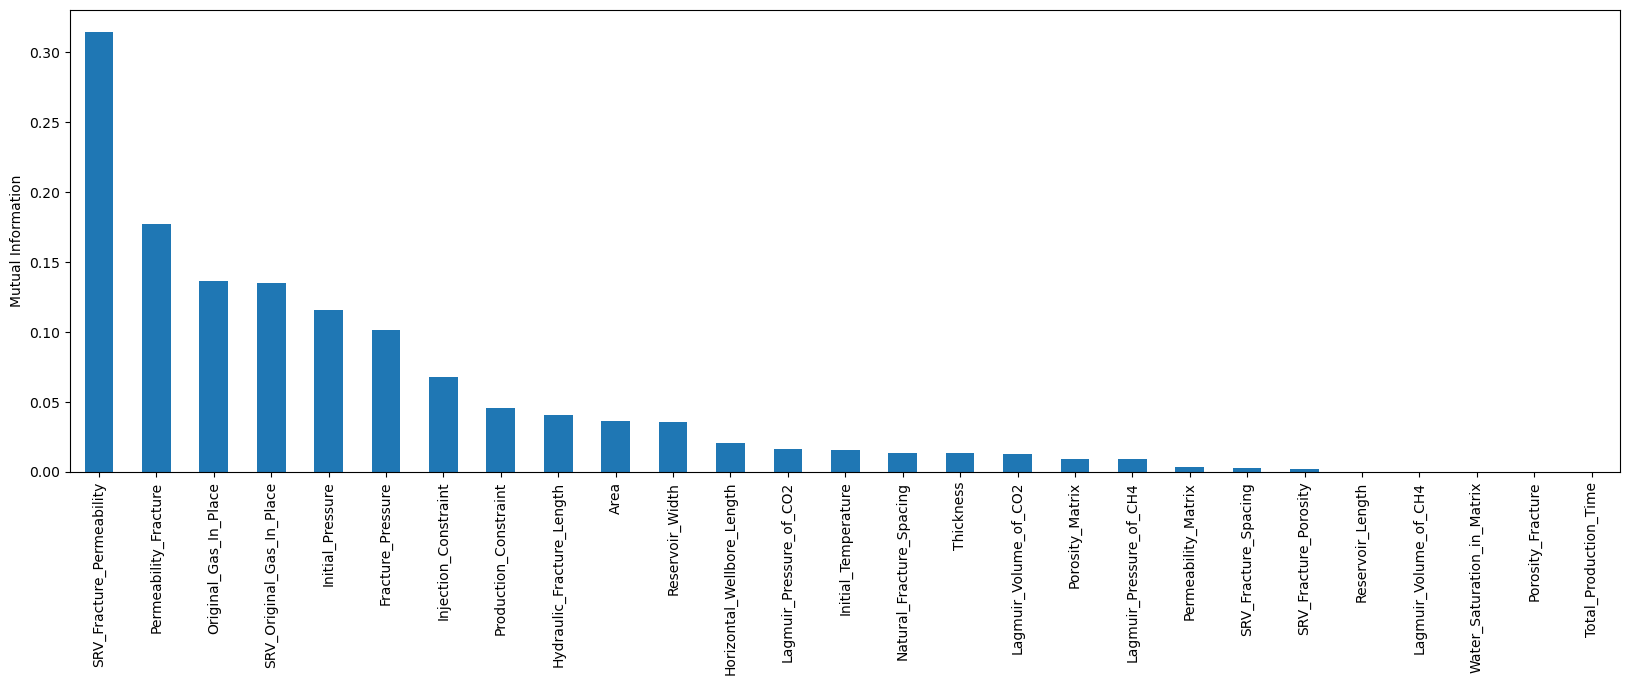

In [13]:
# determine the mutual information
mi = mutual_info_regression(x_train, y_train)

# and make a bar  plot
mi = pd.Series(mi)
mi.index = x_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20,6))
plt.ylabel('Mutual Information')

## 4.2 Correlation 

##### Heatmap provides information about the correlation of all features with each other. This analysis also proves that SRV Fracture Permeability is the most important feature

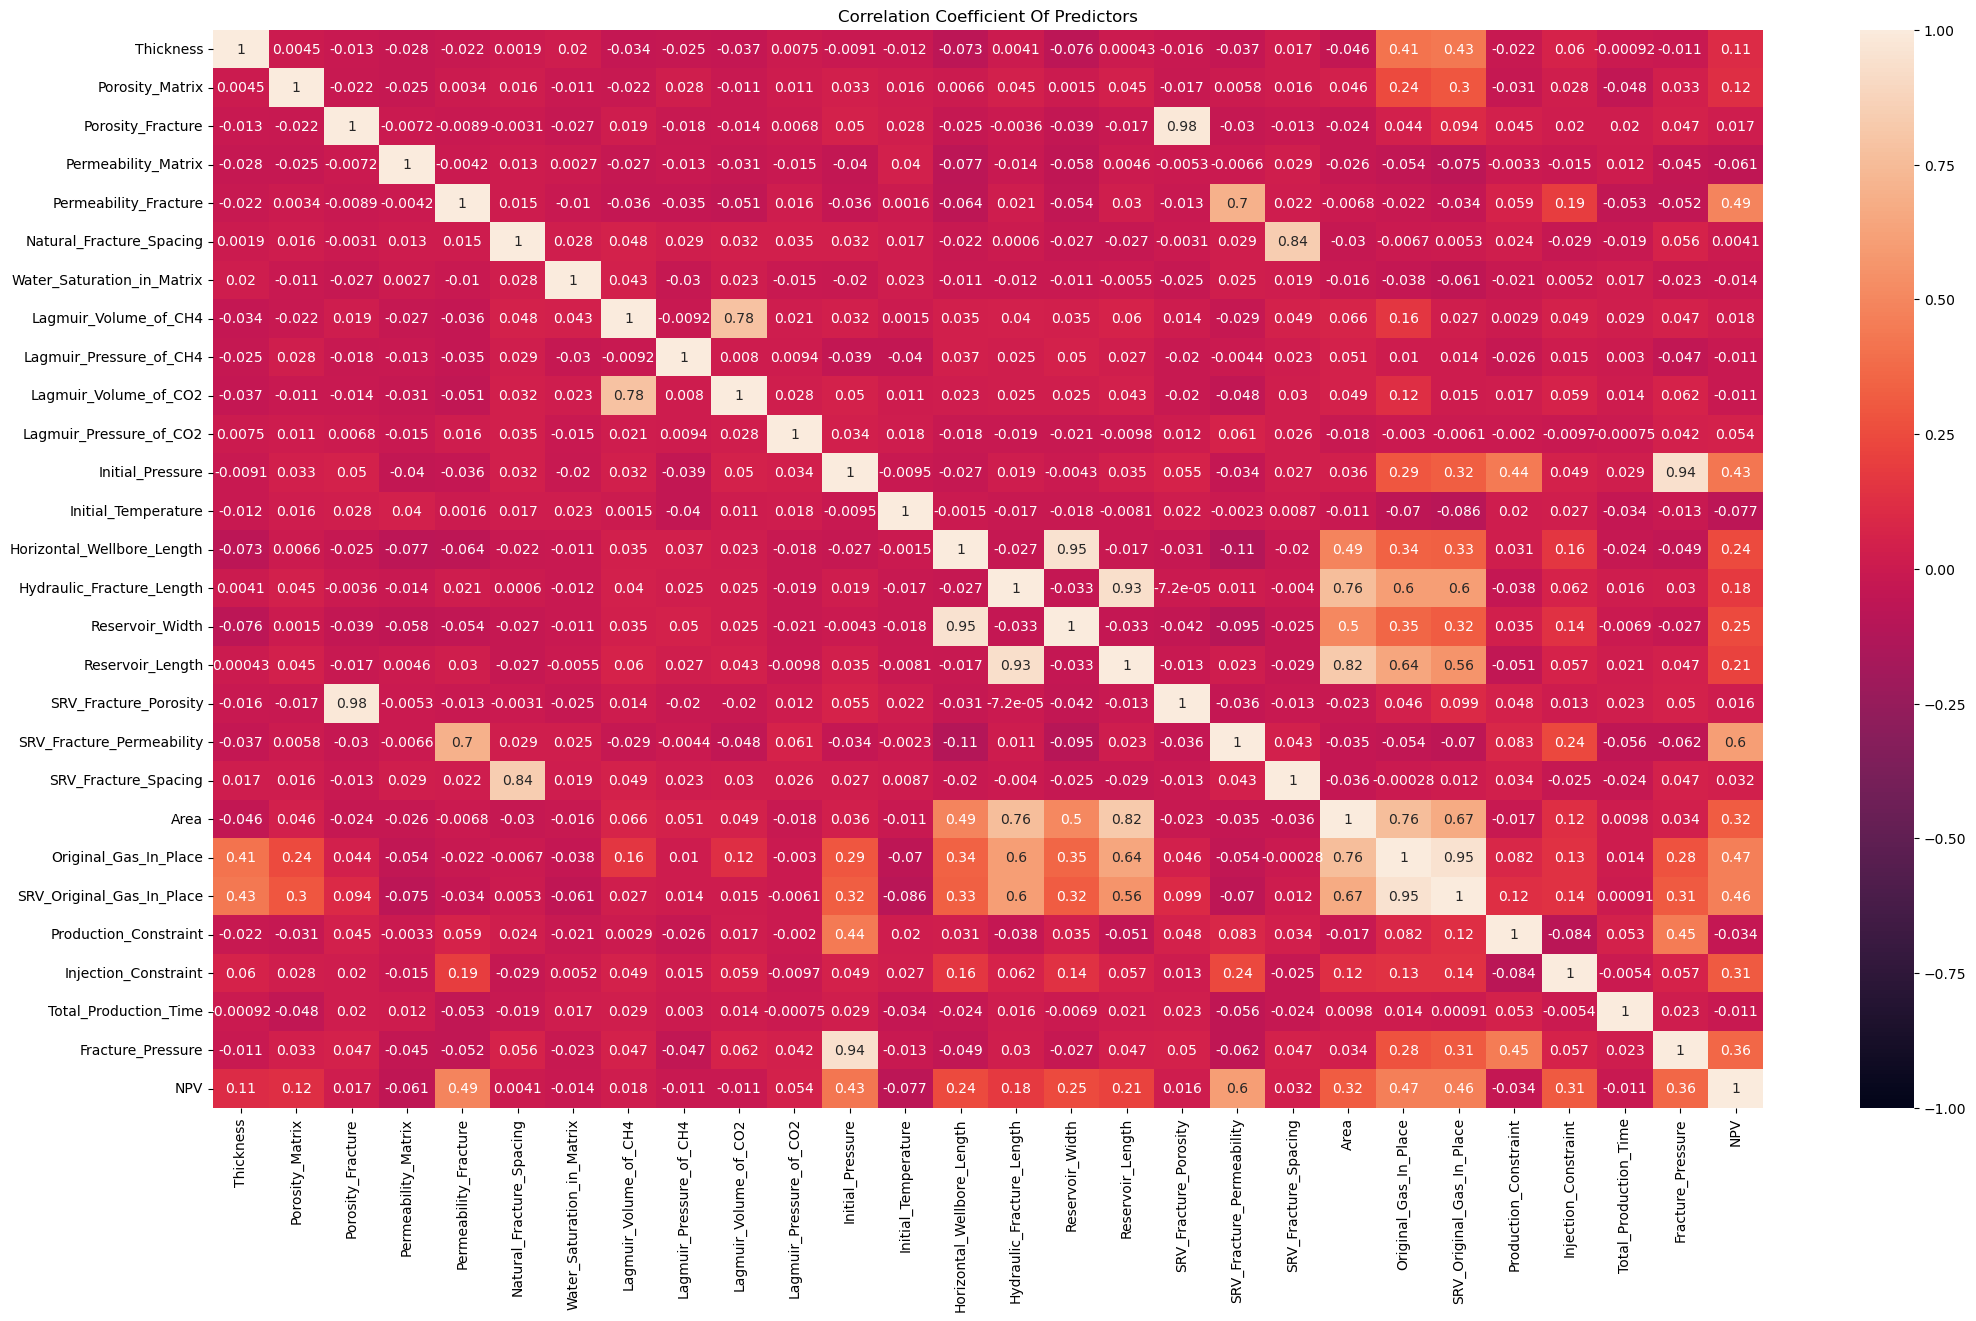

In [14]:
# set figure size
plt.figure(figsize=(25,14))

# generate heatmap
sns.heatmap(train_data.corr(), annot=True, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()


In [15]:
train_data.corr()

Thickness  Porosity_Matrix  Porosity_Fracture  \
Thickness                    1.000000         0.004478          -0.013211   
Porosity_Matrix              0.004478         1.000000          -0.022493   
Porosity_Fracture           -0.013211        -0.022493           1.000000   
Permeability_Matrix         -0.027701        -0.025360          -0.007224   
Permeability_Fracture       -0.022367         0.003381          -0.008877   
Natural_Fracture_Spacing     0.001862         0.016047          -0.003077   
Water_Saturation_in_Matrix   0.019563        -0.011415          -0.027044   
Lagmuir_Volume_of_CH4       -0.033785        -0.021795           0.018559   
Lagmuir_Pressure_of_CH4     -0.024744         0.028380          -0.017743   
Lagmuir_Volume_of_CO2       -0.036650        -0.011139          -0.013837   
Lagmuir_Pressure_of_CO2      0.007548         0.011192           0.006761   
Initial_Pressure            -0.009062         0.033227           0.049959   
Initial_Temperature         -0.012295         0.016101           0.028395   
Horizontal_Wellbore_Length  -0.072979         0.006598          -0.025033   
Hydraulic_Fracture_Length    0.004131         0.044875          -0.003561   
Reservoir_Width             -0.075612         0.001544          -0.039144   
Reservoir_Length             0.000432         0.045041          -0.016961   
SRV_Fracture_Porosity       -0.015615        -0.016747           0.979613   
SRV_Fracture_Permeability   -0.036723         0.005794          -0.029789   
SRV_Fracture_Spacing         0.017168         0.016213          -0.012651   
Area                        -0.045816         0.045536          -0.024300   
Original_Gas_In_Place        0.409002         0.244154           0.043711   
SRV_Original_Gas_In_Place    0.430164         0.295012           0.094226   
Production_Constraint       -0.022069        -0.030920           0.044964   
Injection_Constraint         0.059526         0.027745           0.019817   
Total_Production_Time       -0.000921        -0.047611           0.019946   
Fracture_Pressure           -0.011261         0.032979           0.047445   
NPV                          0.106533         0.123217           0.016500   

                            Permeability_Matrix  Permeability_Fracture  \
Thickness                             -0.027701              -0.022367   
Porosity_Matrix                       -0.025360               0.003381   
Porosity_Fracture                     -0.007224              -0.008877   
Permeability_Matrix                    1.000000              -0.004215   
Permeability_Fracture                 -0.004215               1.000000   
Natural_Fracture_Spacing               0.013080               0.014598   
Water_Saturation_in_Matrix             0.002669              -0.010209   
Lagmuir_Volume_of_CH4                 -0.026916              -0.035929   
Lagmuir_Pressure_of_CH4               -0.012758              -0.035071   
Lagmuir_Volume_of_CO2                 -0.030865              -0.050881   
Lagmuir_Pressure_of_CO2               -0.014634               0.015904   
Initial_Pressure                      -0.040049              -0.036165   
Initial_Temperature                    0.040276               0.001598   
Horizontal_Wellbore_Length            -0.077066              -0.064126   
Hydraulic_Fracture_Length             -0.014222               0.020822   
Reservoir_Width                       -0.058345              -0.054054   
Reservoir_Length                       0.004641               0.030266   
SRV_Fracture_Porosity                 -0.005269              -0.013236   
SRV_Fracture_Permeability             -0.006643               0.698703   
SRV_Fracture_Spacing                   0.029171               0.021987   
Area                                  -0.026375              -0.006752   
Original_Gas_In_Place                 -0.054222              -0.021752   
SRV_Original_Gas_In_Place             -0.075320              -0.033920   
Production_Constra

##### Following cell returns the combinations of independent features having higher correlation than threshold

In [16]:
def correlation_list(df, num):
    "Function return combinations of independent features having higher correlation than threshold"
    df_np=np.array(df)
    indexes=np.concatenate((np.where((df_np>num) & (df_np<1))[0].reshape(np.where((df_np>num) & (df_np<1))[0].shape[0], 1),np.where((df_np>num) & (df_np<1))[1].reshape(np.where((df_np>num) & (df_np<1))[1].shape[0], 1)), axis=1)
    cor_list=[[df.iloc[[i],[j]].index[0],df.iloc[[i],[j]].columns[0], df.iloc[i,j]] for i,j in indexes]
    return cor_list

##### In this analysis, I have used threshold as 0.7. This analysis shows that there is multicollinearity in our dataset

In [17]:
repetition={}
new_cor_list=[]
unique_numbers=[]
for i, j, k in correlation_list(train_data.corr(),0.7):
    if k not in unique_numbers:
        unique_numbers.append(k)
        new_cor_list.append([i,j,k])
        repetition.setdefault(i,0)
        repetition.setdefault(j,0)
        repetition.update({i:repetition[i]+1})
        repetition.update({j:repetition[j]+1})
        
new_cor_list    

[['Porosity_Fracture', 'SRV_Fracture_Porosity', 0.9796125830179302],
 ['Natural_Fracture_Spacing', 'SRV_Fracture_Spacing', 0.8365712304237264],
 ['Lagmuir_Volume_of_CH4', 'Lagmuir_Volume_of_CO2', 0.7836801906245703],
 ['Initial_Pressure', 'Fracture_Pressure', 0.9380650951475069],
 ['Horizontal_Wellbore_Length', 'Reservoir_Width', 0.9457493648979196],
 ['Hydraulic_Fracture_Length', 'Reservoir_Length', 0.9301363015210593],
 ['Hydraulic_Fracture_Length', 'Area', 0.7637328006025877],
 ['Reservoir_Length', 'Area', 0.8213514817781876],
 ['Area', 'Original_Gas_In_Place', 0.7585980601450932],
 ['Original_Gas_In_Place', 'SRV_Original_Gas_In_Place', 0.9458253640870864]]

###### Following list shows the number of times a feature has been observed in higly correlated combinations 

In [18]:
pd.Series(repetition).sort_values(ascending=False)

Area                          3
Hydraulic_Fracture_Length     2
Reservoir_Length              2
Original_Gas_In_Place         2
Porosity_Fracture             1
SRV_Fracture_Porosity         1
Natural_Fracture_Spacing      1
SRV_Fracture_Spacing          1
Lagmuir_Volume_of_CH4         1
Lagmuir_Volume_of_CO2         1
Initial_Pressure              1
Fracture_Pressure             1
Horizontal_Wellbore_Length    1
Reservoir_Width               1
SRV_Original_Gas_In_Place     1
dtype: int64

## 4.3 Variance Inflation Factor

##### According to the results obtained from VIF, there is multicollinearity in our dataset, so we should remove some of the features before building a model

In [19]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = x_train[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [20]:
# features to consider removing
considered_features = x_train.columns

# compute vif 
compute_vif(considered_features).sort_values('VIF', ascending=False)

Variable        VIF
21       Original_Gas_In_Place  57.217852
22   SRV_Original_Gas_In_Place  52.451093
16            Reservoir_Length  36.133141
20                        Area  29.457313
14   Hydraulic_Fracture_Length  25.689633
17       SRV_Fracture_Porosity  25.574658
2            Porosity_Fracture  25.219754
15             Reservoir_Width  20.420229
13  Horizontal_Wellbore_Length  17.211261
11            Initial_Pressure   9.305827
26           Fracture_Pressure   8.834168
7        Lagmuir_Volume_of_CH4   3.450616
5     Natural_Fracture_Spacing   3.363853
19        SRV_Fracture_Spacing   3.351427
0                    Thickness   3.302308
9        Lagmuir_Volume_of_CO2   2.624619
18   SRV_Fracture_Permeability   2.126235
4        Permeability_Fracture   1.972821
1              Porosity_Matrix   1.656158
23       Production_Constraint   1.357161
24        Injection_Constraint   1.184102
12         Initial_Temperature   1.067671
6   Water_Saturation_in_Matrix   1.029529
8      Lagmuir_Pressure_of_CH4   1.024816
3          Permeability_Matrix   1.023406
25       Total_Production_Time   1.019635
10     Lagmuir_Pressure_of_CO2   1.014796

##### As we remove some features from our dataset, VIF values for other predictors also decrease and vary in an acceptable range

In [21]:
# features to consider removing
predictors=[col for col in x_train.columns if col not in ["Porosity_Fracture","Hydraulic_Fracture_Length","Fracture_Pressure","Reservoir_Length","Area","Original_Gas_In_Place","Horizontal_Wellbore_Length","Lagmuir_Volume_of_CO2","Natural_Fracture_Spacing"]]
considered_features = predictors

# compute vif 
compute_vif(considered_features).sort_values('VIF', ascending=False)

Variable       VIF
14   SRV_Original_Gas_In_Place  2.088989
12   SRV_Fracture_Permeability  2.078514
3        Permeability_Fracture  1.970304
8             Initial_Pressure  1.493874
0                    Thickness  1.457177
10             Reservoir_Width  1.316178
15       Production_Constraint  1.304612
1              Porosity_Matrix  1.176456
16        Injection_Constraint  1.143719
11       SRV_Fracture_Porosity  1.035748
9          Initial_Temperature  1.021375
5        Lagmuir_Volume_of_CH4  1.016262
4   Water_Saturation_in_Matrix  1.014155
17       Total_Production_Time  1.013002
6      Lagmuir_Pressure_of_CH4  1.011913
2          Permeability_Matrix  1.011630
13        SRV_Fracture_Spacing  1.011511
7      Lagmuir_Pressure_of_CO2  1.010946

##### After analyzing results of above three techniques, I removed following features from our dataset in order to avoid from multicollinearity for improving the model performance

In [22]:
x_train_droped=x_train.drop(["Porosity_Fracture","Hydraulic_Fracture_Length","Fracture_Pressure","Reservoir_Length","Area","Original_Gas_In_Place","Horizontal_Wellbore_Length","Lagmuir_Volume_of_CO2","Natural_Fracture_Spacing"], axis=1)
x_test_droped=x_test.drop(["Porosity_Fracture","Hydraulic_Fracture_Length","Fracture_Pressure","Reservoir_Length","Area","Original_Gas_In_Place","Horizontal_Wellbore_Length","Lagmuir_Volume_of_CO2","Natural_Fracture_Spacing"], axis=1)
x_train_droped.shape, x_test_droped.shape

((2037, 18), (510, 18))

In [23]:
x_train_droped.head()

Thickness  Porosity_Matrix  Permeability_Matrix  Permeability_Fracture  \
330   296.577186         5.253579             0.000048               0.001015   
8     257.704317         7.896001             0.000095               0.000210   
1502  131.522274         6.295507             0.000010               0.000790   
411   241.885797         7.429805             0.000037               0.000295   
1521  261.543620         8.012762             0.000074               0.000729   

      Water_Saturation_in_Matrix  Lagmuir_Volume_of_CH4  \
330                    11.059854             174.742891   
8                       8.774475             230.303634   
1502                    9.536356             139.348596   
411                    13.940891             224.930876   
1521                   11.397628              66.184036   

      Lagmuir_Pressure_of_CH4  Lagmuir_Pressure_of_CO2  Initial_Pressure  \
330                633.539869               295.041355       4850.837893   
8                  224.510461               900.915709       5641.661068   
1502               577.469608               752.990996       4627.398628   
411                555.830801               854.497108       4923.124129   
1521               776.724416               744.446430       4135.613972   

      Initial_Temperature  Reservoir_Width  SRV_Fracture_Porosity  \
330            120.524748      3267.906618               0.933305   
8              177.125683      4478.290226               1.134639   
1502           176.093117      6787.171430               1.714590   
411            155.110470      4593.687403               2.199969   
1521           143.707471      4917.844624               1.562241   

      SRV_Fracture_Permeability  SRV_Fracture_Spacing  \
330                    0.004069              1.565390   
8                      0.001159              0.414794   
1502                   0.001797              1.468669   
411                    0.002323              0.651574   
1521                   0.004595              1.431799   

      SRV_Original_Gas_In_Place  Production_Constraint  Injection_Constraint  \
330                8.235600e+09             854.783159          2.640830e+06   
8                  8.464610e+09            1125.979661          1.846206e+06   
1502               6.642560e+09            1977.667890          6.107865e+05   
411                1.375450e+10            1238.173164          2.832995e+06   
1521               1.463610e+10            1752.912475          3.109557e+06   

      Total_Production_Time  
330            17142.997560  
8               7604.148545  
1502           11097.540150  
411            12872.877590  
1521           15086.149750

In [24]:
train_data_droped=pd.concat([x_train_droped, y_train], axis=1)
test_data_droped=pd.concat([x_test_droped,y_test], axis=1)
train_data_droped.shape,test_data_droped.shape

((2037, 19), (510, 19))

# 5. Outlier Treatment

###### I have analyzed only one feature (SRV_fracture_permeability) here. The notebook named "Exploratory Data Analysis" contains the same analysis for other features as well

In [25]:
# function to create histogram, Q-Q plot and boxplot

# for Q-Q plots I have import scipy-stats
import scipy.stats as stats

def diagnostic_plots(df, variable):
    
    """function takes a dataframe (df) and the variable of interest as arguments"""

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

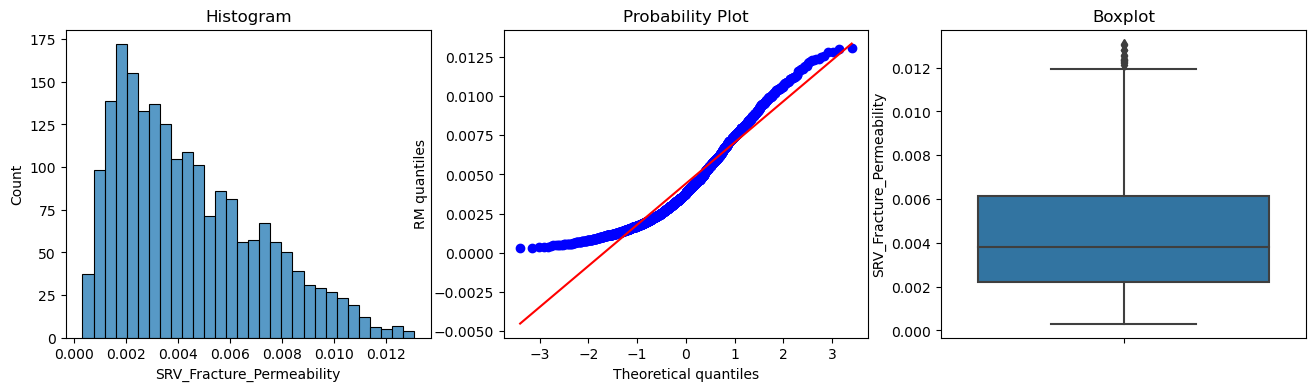

In [26]:
diagnostic_plots(x_train, 'SRV_Fracture_Permeability')

In [27]:
x_train[["SRV_Fracture_Permeability"]].describe()

SRV_Fracture_Permeability
count                2037.000000
mean                    0.004412
std                     0.002714
min                     0.000311
25%                     0.002195
50%                     0.003800
75%                     0.006153
max                     0.013096

In [28]:
def find_boundaries(df, variable, distance = 1.5):

    """Calculation of the boundaries outside which sit the outliers for skewed distributions distance passed as an argument,
       gives us the option to estimate 1.5 times or 3 times the IQR to calculate the boundaries."""

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

###### In "SRV_Fracture_Permeability", there was no outlier in the lower boundary

In [29]:
PF_upper_limit,PF_lower_limit = find_boundaries(data, 'SRV_Fracture_Permeability')
PF_upper_limit,PF_lower_limit

(0.011938576499999999, -0.0036470515)

###### There are 19 records in our dataset where the "SRV_Fracture_Permeability" values are higher than our pre-defined upper limit or lower than lower limit.

In [30]:
data[data['SRV_Fracture_Permeability']>PF_upper_limit].shape

(19, 29)

In [31]:
data[data['SRV_Fracture_Permeability']<PF_lower_limit].shape

(0, 29)

###### However, I didn't delete these outliers from our dataset beacuse I think that our model can also learn from these records. Instead, I applied feature scaling and transformation to make it more normally distributed.

# 6. Feature Scaling

###### Features in our train dataset have different ranges, in order to improve the accuracy of our model, I have scaled all features to the similar range by using Robust Scaler method. Then, I stored new scaled data in the dataframe named train_data_scaled

In [32]:
# the scaler - for robust scaling
from sklearn.preprocessing import RobustScaler

# set up the scaler
scaler = RobustScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(train_data_droped)

# transform train and test sets
train_data_scaled = scaler.transform(train_data_droped)

###### The scaler stores the median values of the features as learned from train set

In [33]:
scaler.center_

array([2.06190530e+02, 7.60330944e+00, 4.91000000e-05, 6.19356000e-04,
       9.57610969e+00, 1.45766766e+02, 5.87461339e+02, 6.20188843e+02,
       5.37755576e+03, 1.60642154e+02, 5.08458757e+03, 1.76874957e+00,
       3.79962800e-03, 1.13837236e+00, 8.96881000e+09, 1.30590721e+03,
       2.06297591e+06, 1.27129510e+04, 2.37396864e+00])

###### The scaler stores the IQR values of the features as learned from train set


In [34]:
scaler.scale_

array([9.55820559e+01, 2.48754945e+00, 5.02000000e-05, 4.74446000e-04,
       4.61559981e+00, 1.00014726e+02, 4.01252098e+02, 4.08194032e+02,
       2.50612741e+03, 3.91673514e+01, 2.00530709e+03, 9.78960081e-01,
       3.95796500e-03, 6.45718724e-01, 7.86717000e+09, 1.32381877e+03,
       1.56510259e+06, 5.49165567e+03, 2.08588588e+01])

##### I have plotted ranges of non-scaled and scaled versions of only three features (Permeability Matrix, Thickness, SRV Original Gas In Place) here to see the impact of feature scaling with visualizations. It is clear that after applying robust scaler, all three features range in the similar interval

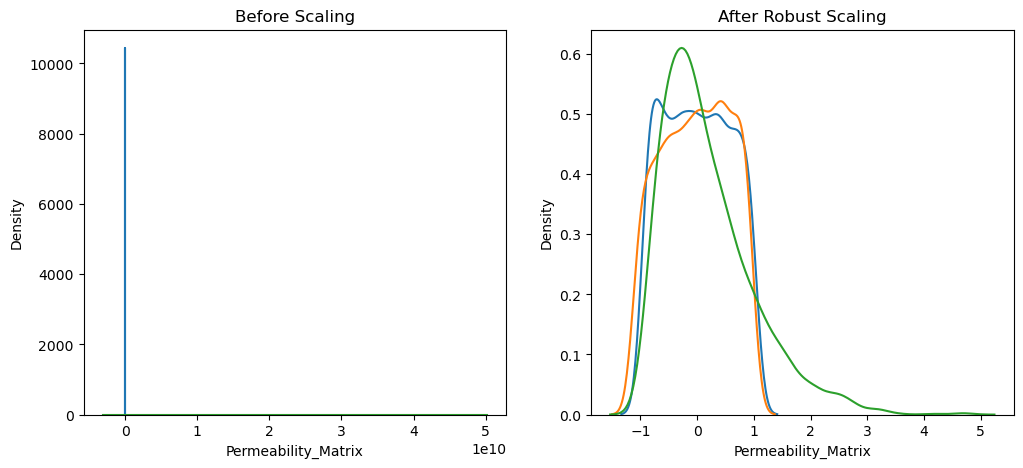

In [35]:
train_data_scaled = pd.DataFrame(train_data_scaled, columns=train_data_droped.columns)
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(train_data_droped['Permeability_Matrix'], ax=ax1)
sns.kdeplot(train_data_droped['Thickness'], ax=ax1)
sns.kdeplot(train_data_droped['SRV_Original_Gas_In_Place'], ax=ax1)

# after scaling
ax2.set_title('After Robust Scaling')
sns.kdeplot(train_data_scaled['Permeability_Matrix'], ax=ax2)
sns.kdeplot(train_data_scaled['Thickness'], ax=ax2)
sns.kdeplot(train_data_scaled['SRV_Original_Gas_In_Place'], ax=ax2)
plt.show()

In [36]:
train_data_scaled.head()

Thickness  Porosity_Matrix  Permeability_Matrix  Permeability_Fracture  \
0   0.945645        -0.944596            -0.013944               0.834379   
1   0.538948         0.117662             0.912351              -0.862233   
2  -0.781195        -0.525739            -0.781673               0.360163   
3   0.373452        -0.069749            -0.247012              -0.683123   
4   0.579116         0.164601             0.503984               0.231529   

   Water_Saturation_in_Matrix  Lagmuir_Volume_of_CH4  Lagmuir_Pressure_of_CH4  \
0                    0.321463               0.289719                 0.114837   
1                   -0.173679               0.845244                -0.904546   
2                   -0.008613              -0.064172                -0.024901   
3                    0.945659               0.791525                -0.078830   
4                    0.394644              -0.795710                 0.471681   

   Lagmuir_Pressure_of_CO2  Initial_Pressure  Initial_Temperature  \
0                -0.796551         -0.210172            -1.024256   
1                 0.687729          0.105384             0.420849   
2                 0.325341         -0.299329             0.394486   
3                 0.574012         -0.181328            -0.141232   
4                 0.304408         -0.495562            -0.432367   

   Reservoir_Width  SRV_Fracture_Porosity  SRV_Fracture_Permeability  \
0        -0.905937              -0.853400                   0.068069   
1        -0.302346              -0.647739                  -0.667208   
2         0.849039              -0.055324                  -0.506041   
3        -0.244800               0.440488                  -0.372997   
4        -0.083151              -0.210947                   0.201023   

   SRV_Fracture_Spacing  SRV_Original_Gas_In_Place  Production_Constraint  \
0              0.661306                  -0.093199              -0.340775   
1             -1.120578                  -0.064089              -0.135916   
2              0.511518                  -0.295691               0.507442   
3             -0.753886                   0.608312              -0.051166   
4              0.454418                   0.720372               0.337663   

   Injection_Constraint  Total_Production_Time       NPV  
0              0.369212               0.806687 -0.016491  
1             -0.138502              -0.930285 -0.531672  
2             -0.927856              -0.294157 -0.608659  
3              0.491993               0.029122 -0.141862  
4              0.668698               0.432146  0.051444

In [37]:
train_data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2037 entries, 0 to 2036
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Thickness                   2037 non-null   float64
 1   Porosity_Matrix             2037 non-null   float64
 2   Permeability_Matrix         2037 non-null   float64
 3   Permeability_Fracture       2037 non-null   float64
 4   Water_Saturation_in_Matrix  2037 non-null   float64
 5   Lagmuir_Volume_of_CH4       2037 non-null   float64
 6   Lagmuir_Pressure_of_CH4     2037 non-null   float64
 7   Lagmuir_Pressure_of_CO2     2037 non-null   float64
 8   Initial_Pressure            2037 non-null   float64
 9   Initial_Temperature         2037 non-null   float64
 10  Reservoir_Width             2037 non-null   float64
 11  SRV_Fracture_Porosity       2037 non-null   float64
 12  SRV_Fracture_Permeability   2037 non-null   float64
 13  SRV_Fracture_Spacing        2037 

# 4 - Variable Transformation

##### After feature scaling, in order to make our train data more normally distributed, I have used Yeo-Johnson method and stored the new values in the dataframe named train_data_transformed

In [38]:
# initialize a transformer with yeo-johnson

from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer(method="yeo-johnson", standardize=False)

# fit transformer: transformer will learn the lambdas
transformer.fit(train_data_scaled)

# transform data: returns NumPy array
train_data_transformed = transformer.transform(train_data_scaled)

# transform NumPy array to pandas dataframe
train_data_transformed = pd.DataFrame(train_data_transformed, columns=train_data_scaled.columns)

##### It is obvious that skewed features are now more normally distributed

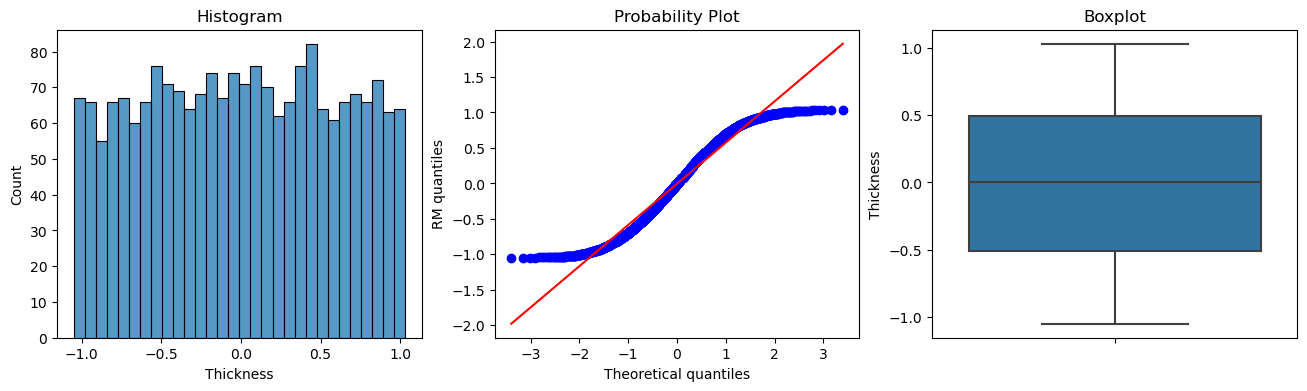

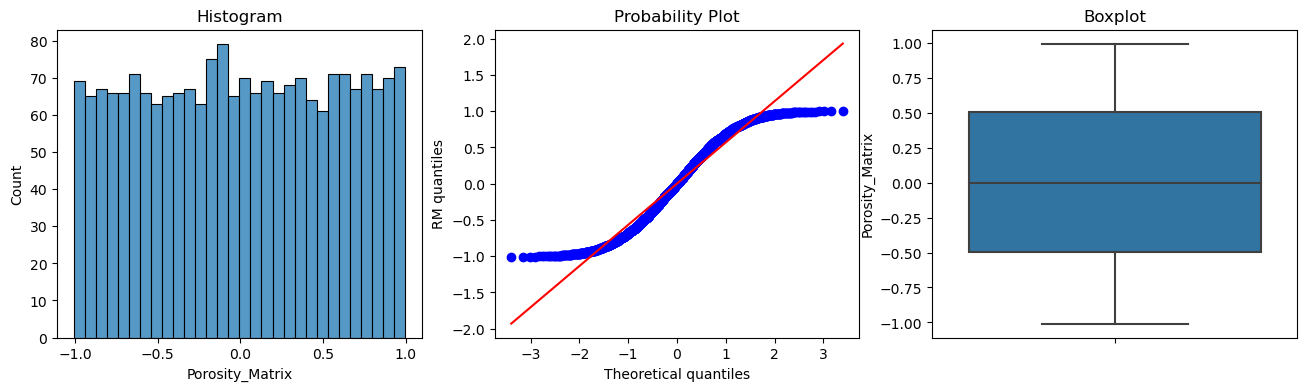

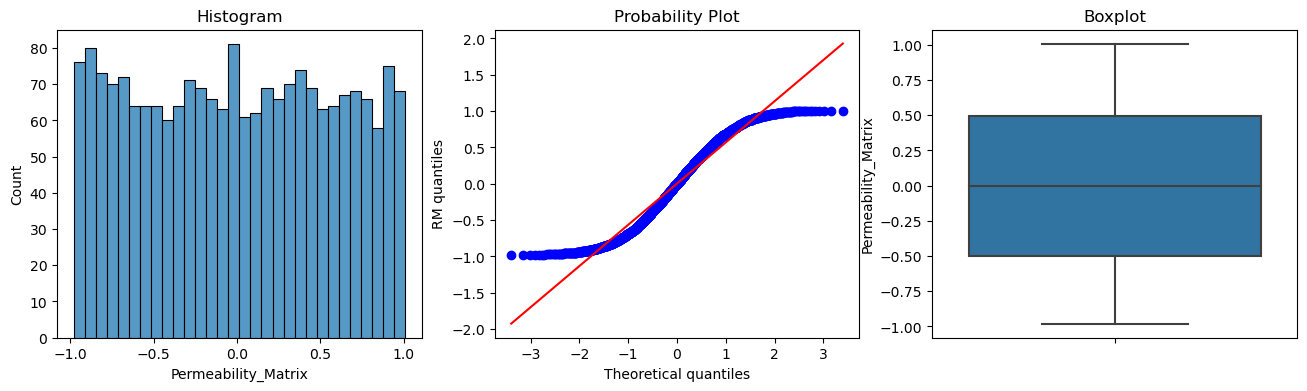

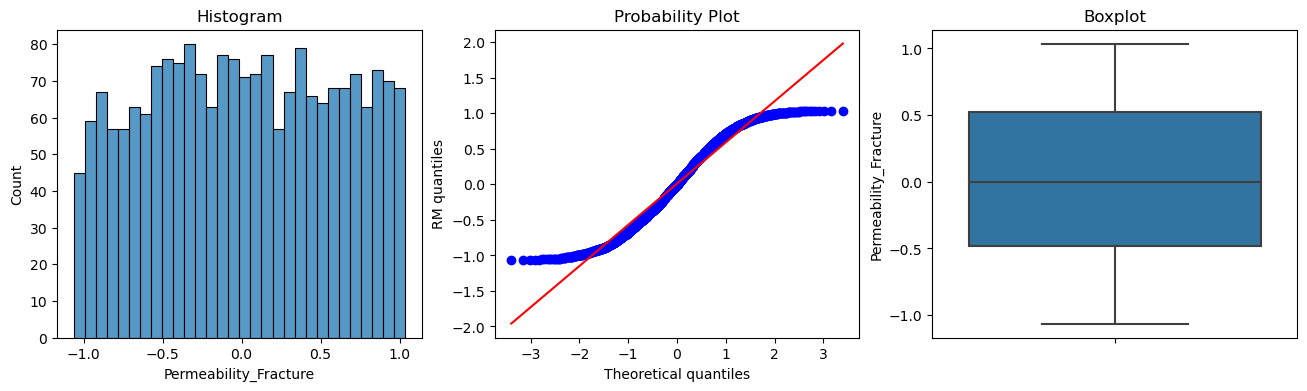

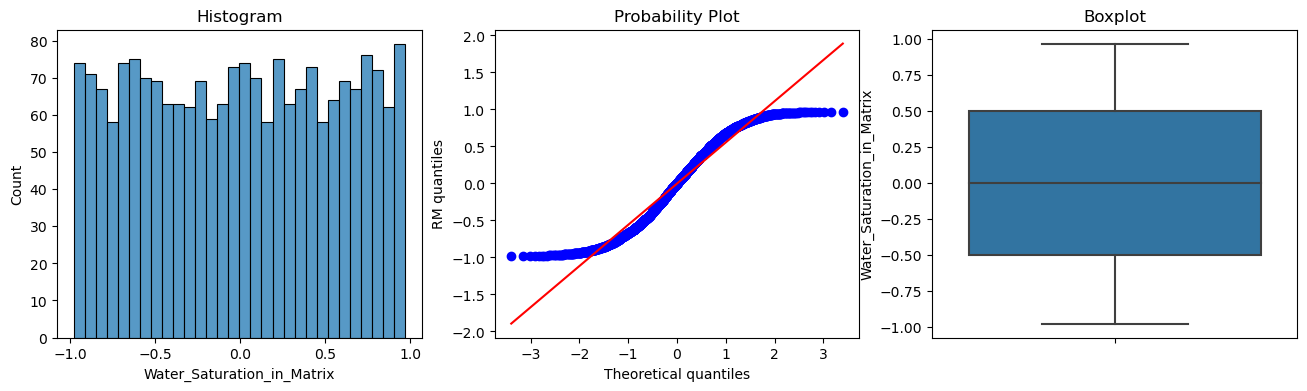

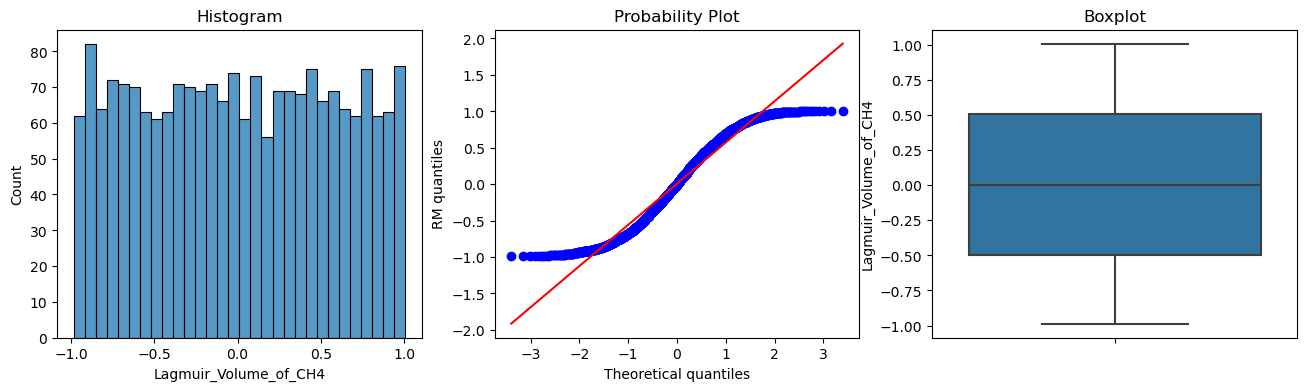

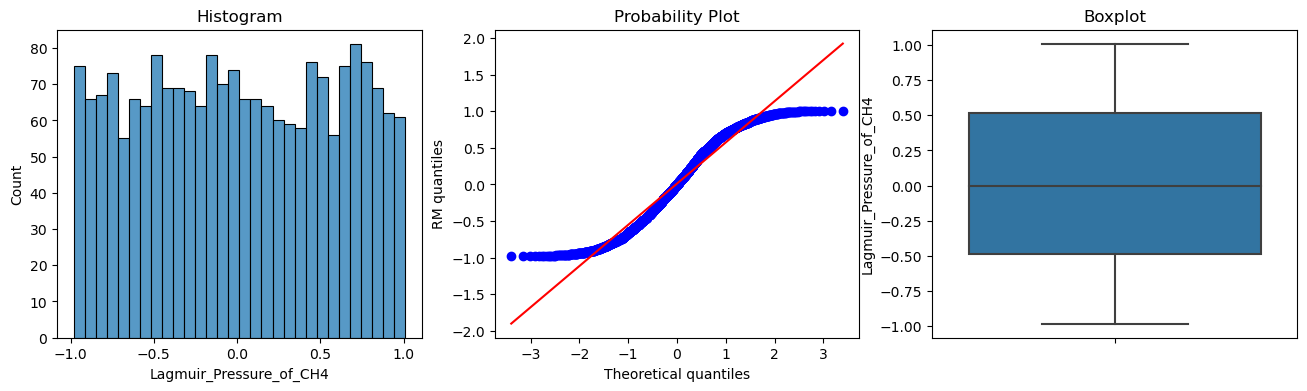

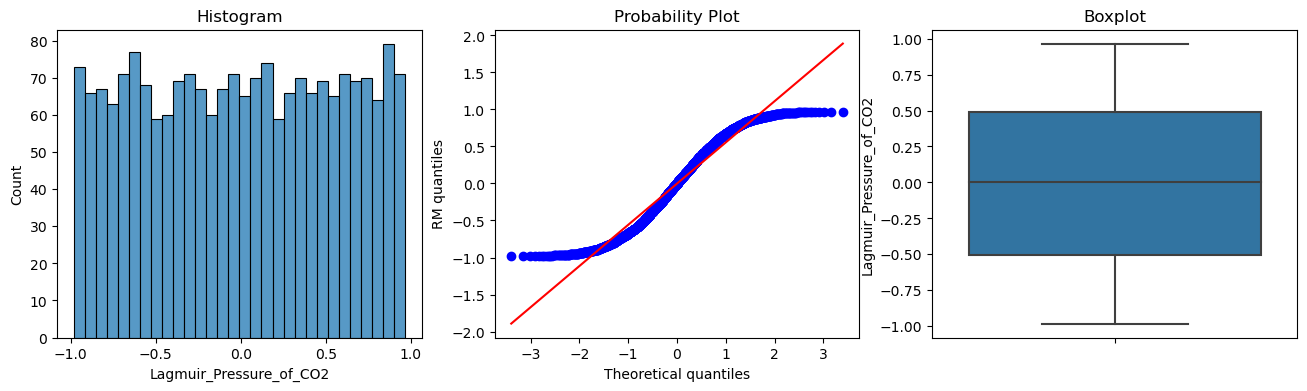

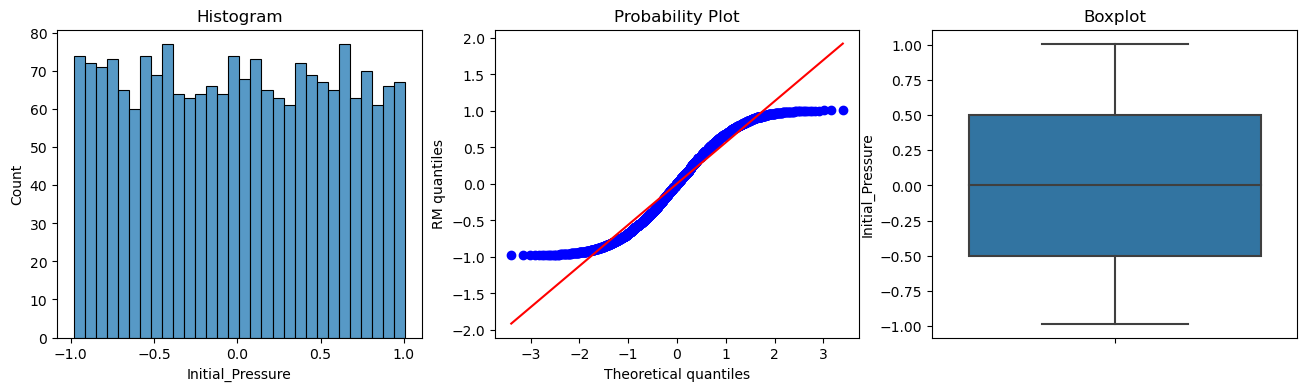

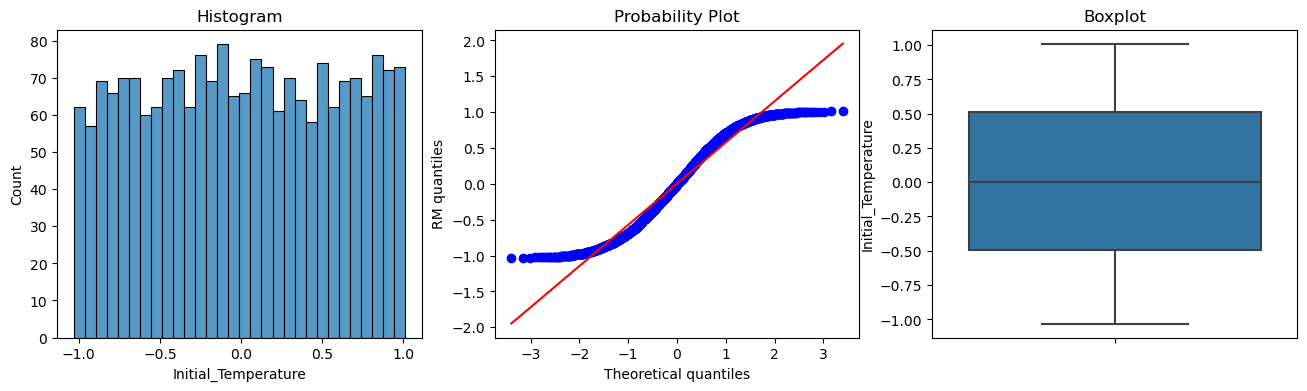

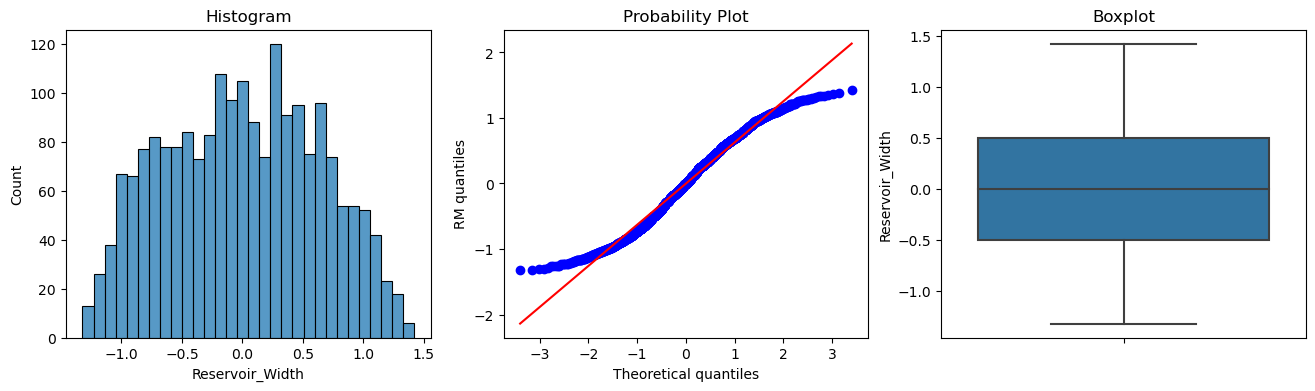

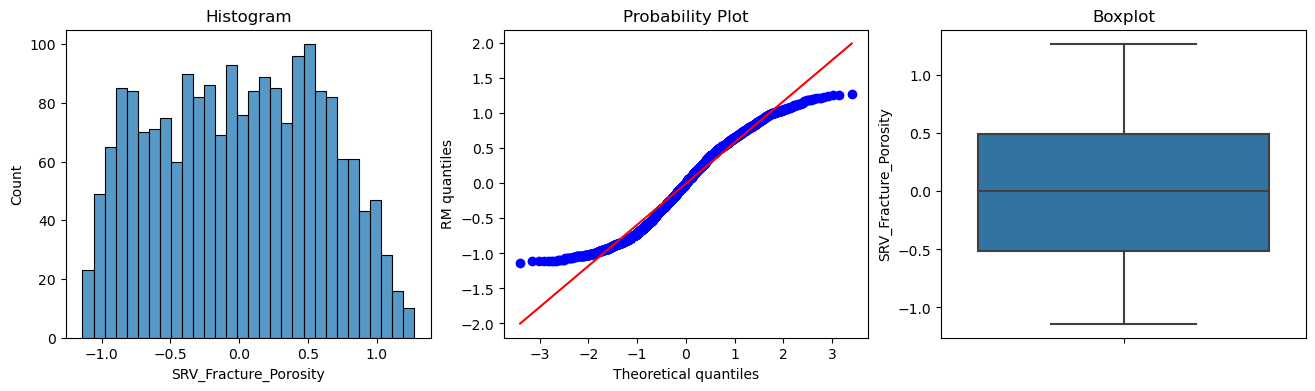

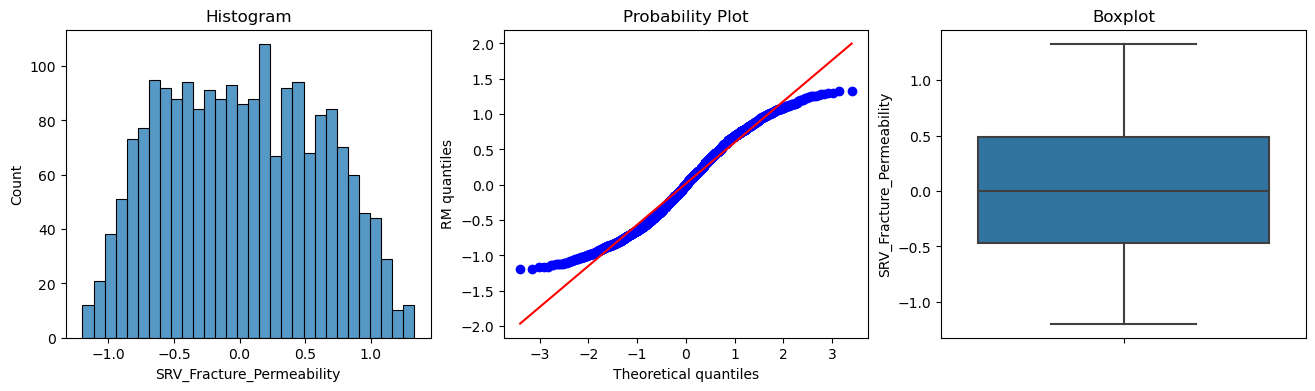

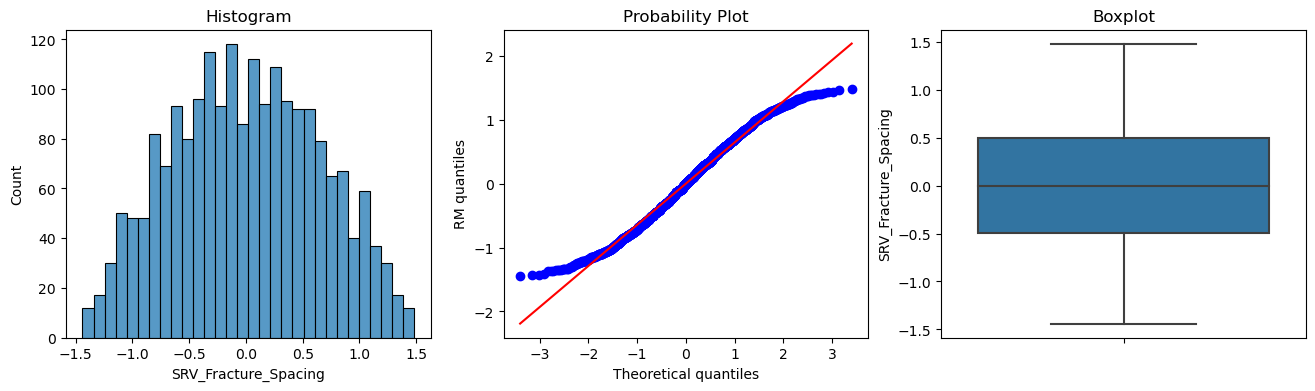

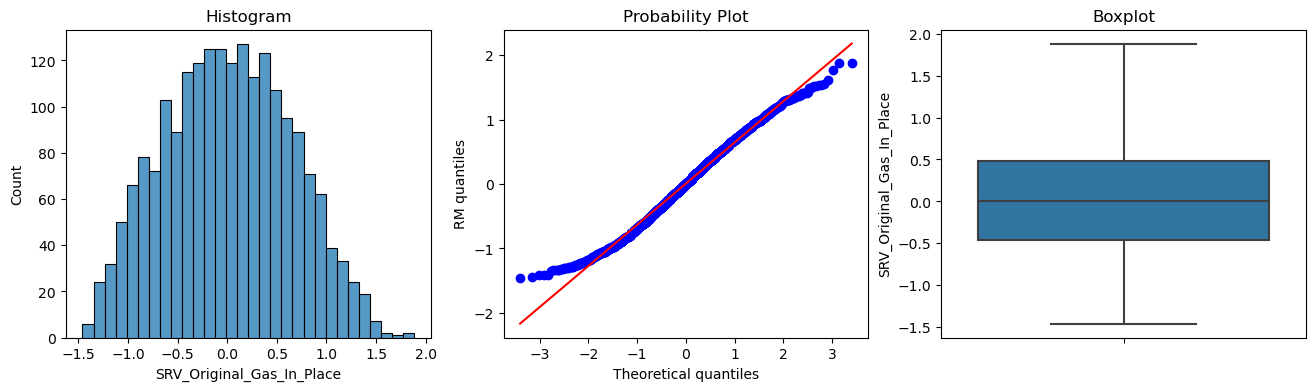

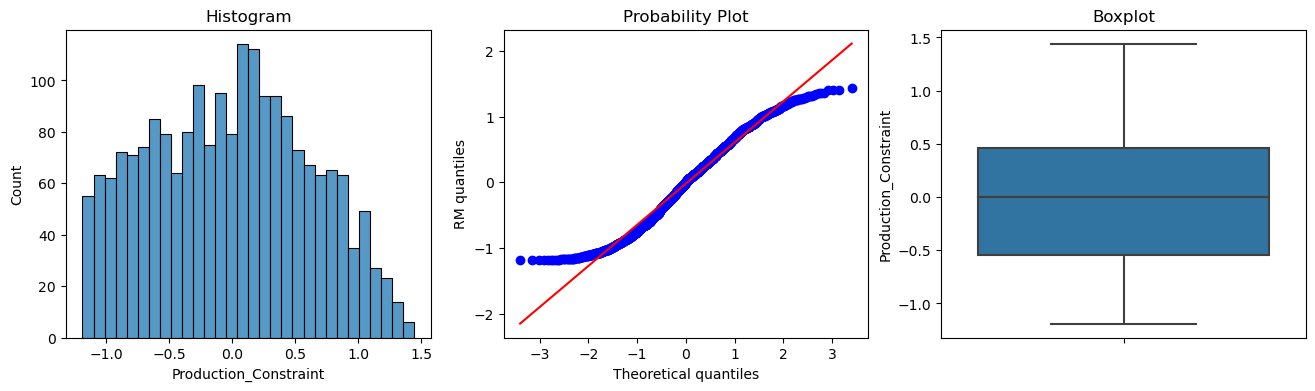

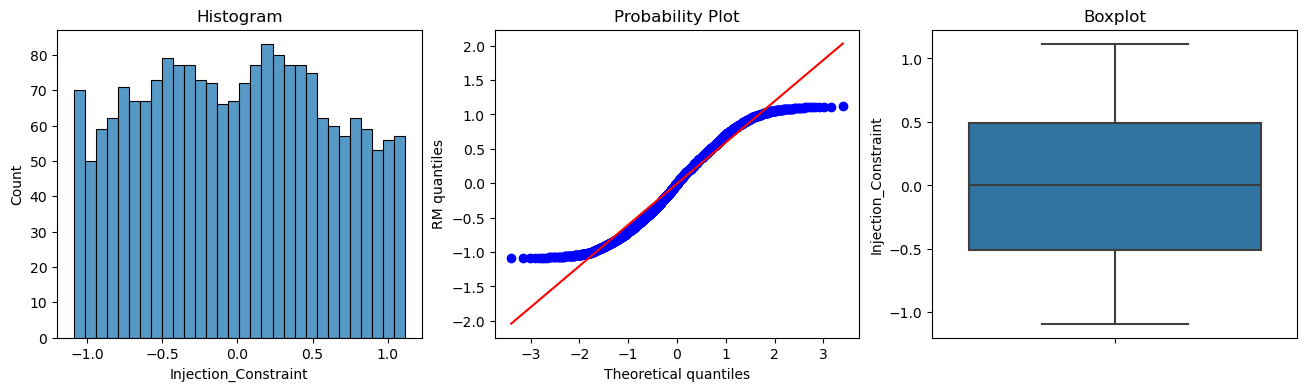

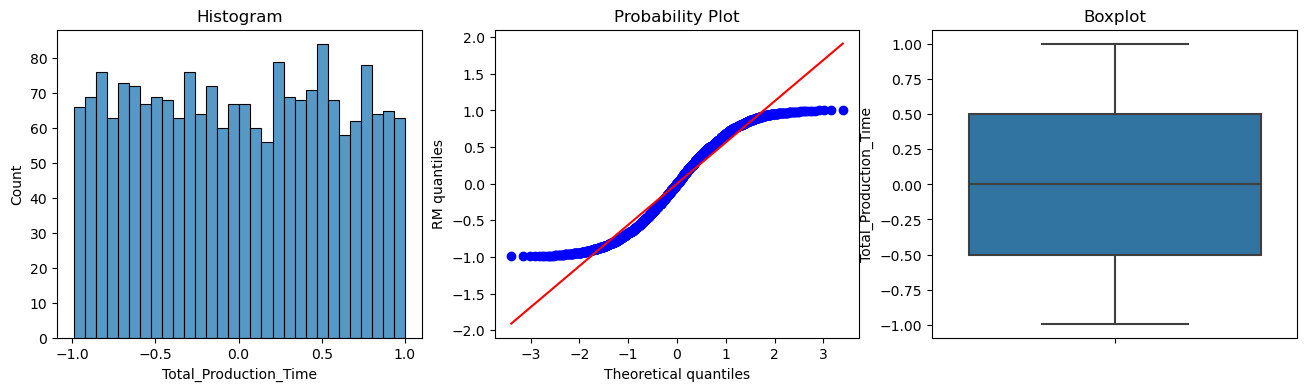

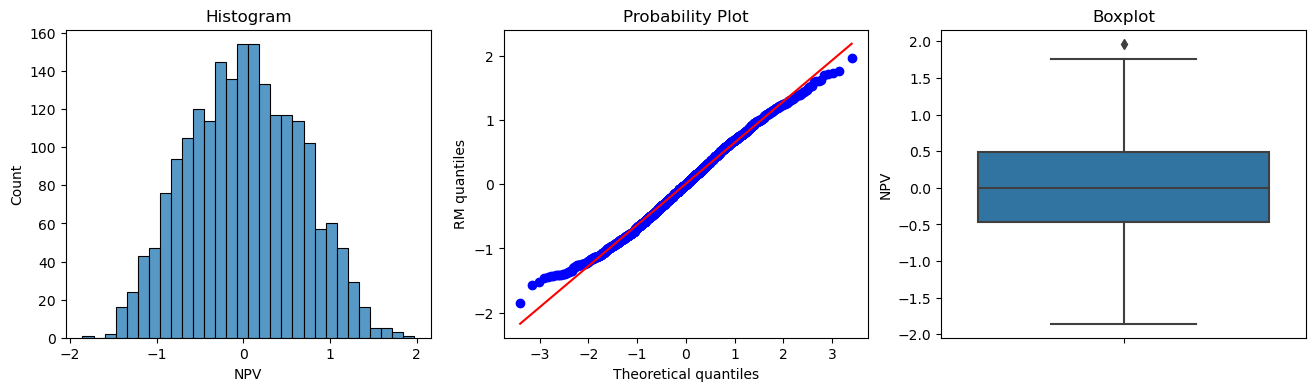

In [39]:
for i in train_data_transformed.columns:
    diagnostic_plots(train_data_transformed, i)

# 5. Test Data Manipulation

##### I have scaled the test data based on the pattern that we learned from the train data and stored the new results in the dataframe named test_data_scaled

In [40]:
# transform test set

test_data_scaled = scaler.transform(test_data_droped)

In [41]:
test_data_scaled = pd.DataFrame(test_data_scaled, columns=test_data_droped.columns)
test_data_scaled.head()

Thickness  Porosity_Matrix  Permeability_Matrix  Permeability_Fracture  \
0  -1.057773        -0.838725             0.402390              -0.643643   
1  -0.187465         0.275720             0.384462               0.779574   
2   0.249762        -0.884052            -0.476096              -0.021729   
3   0.123643        -0.334294            -0.422311               0.577840   
4  -0.746050         0.169941            -0.745020               0.103906   

   Water_Saturation_in_Matrix  Lagmuir_Volume_of_CH4  Lagmuir_Pressure_of_CH4  \
0                    0.073506               0.232340                 0.173648   
1                    0.338736              -0.501614                 0.032072   
2                    0.597901              -0.928448                 1.017708   
3                   -0.459699              -0.109156                -0.795182   
4                    0.607309              -0.727278                -0.638485   

   Lagmuir_Pressure_of_CO2  Initial_Pressure  Initial_Temperature  \
0                -0.414777         -0.304789            -0.728184   
1                -0.976914         -0.152942             0.894423   
2                 0.102346         -0.161042            -0.178784   
3                 0.773581         -0.837540            -0.990908   
4                 0.207784          0.111647            -0.217627   

   Reservoir_Width  SRV_Fracture_Porosity  SRV_Fracture_Permeability  \
0         0.483881               0.180733                  -0.595072   
1        -0.396698               0.497453                   1.548339   
2        -1.095895               0.371775                  -0.155574   
3         0.008562               0.097092                   1.002454   
4         0.567350               0.507898                   0.544900   

   SRV_Fracture_Spacing  SRV_Original_Gas_In_Place  Production_Constraint  \
0              0.339950                  -0.462861              -0.505641   
1              0.179652                  -0.639868               0.449802   
2             -0.660623                  -0.238442              -0.827481   
3             -0.074212                  -0.628943              -0.931446   
4             -0.002918                  -0.522704              -0.648003   

   Injection_Constraint  Total_Production_Time       NPV  
0             -0.264169               0.750707 -0.481983  
1              0.633956               0.300895  0.077030  
2              0.830048              -0.458650 -0.211841  
3              0.340339               0.523746  0.408797  
4              1.142012               0.112990  1.230852

In [42]:
test_data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Thickness                   510 non-null    float64
 1   Porosity_Matrix             510 non-null    float64
 2   Permeability_Matrix         510 non-null    float64
 3   Permeability_Fracture       510 non-null    float64
 4   Water_Saturation_in_Matrix  510 non-null    float64
 5   Lagmuir_Volume_of_CH4       510 non-null    float64
 6   Lagmuir_Pressure_of_CH4     510 non-null    float64
 7   Lagmuir_Pressure_of_CO2     510 non-null    float64
 8   Initial_Pressure            510 non-null    float64
 9   Initial_Temperature         510 non-null    float64
 10  Reservoir_Width             510 non-null    float64
 11  SRV_Fracture_Porosity       510 non-null    float64
 12  SRV_Fracture_Permeability   510 non-null    float64
 13  SRV_Fracture_Spacing        510 non

##### After feature scaling, I have transformed the test data based on the pattern that we learned from the train data and stored the new results in the dataframe named test_data_transformed

In [43]:
test_data_transformed = transformer.transform(test_data_scaled)

# transform NumPy array to pandas dataframe
test_data_transformed = pd.DataFrame(test_data_transformed, columns=test_data_scaled.columns)

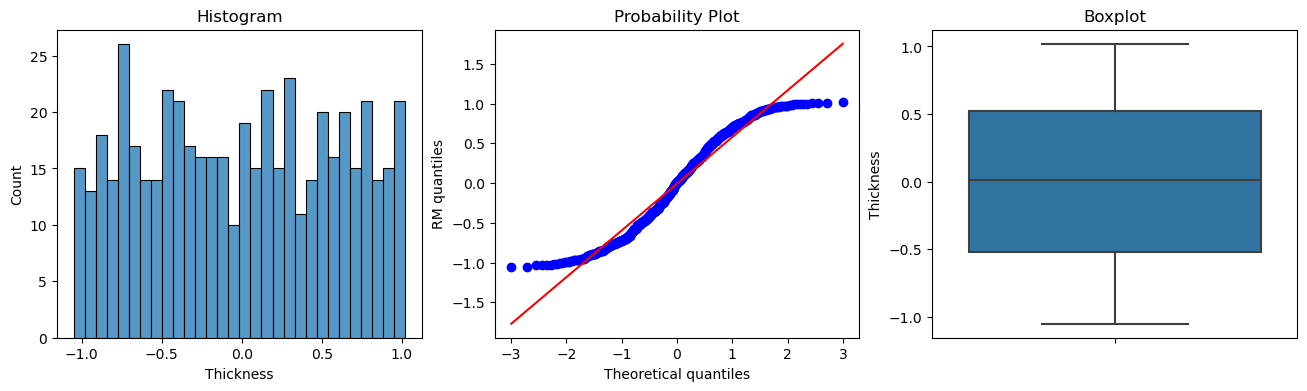

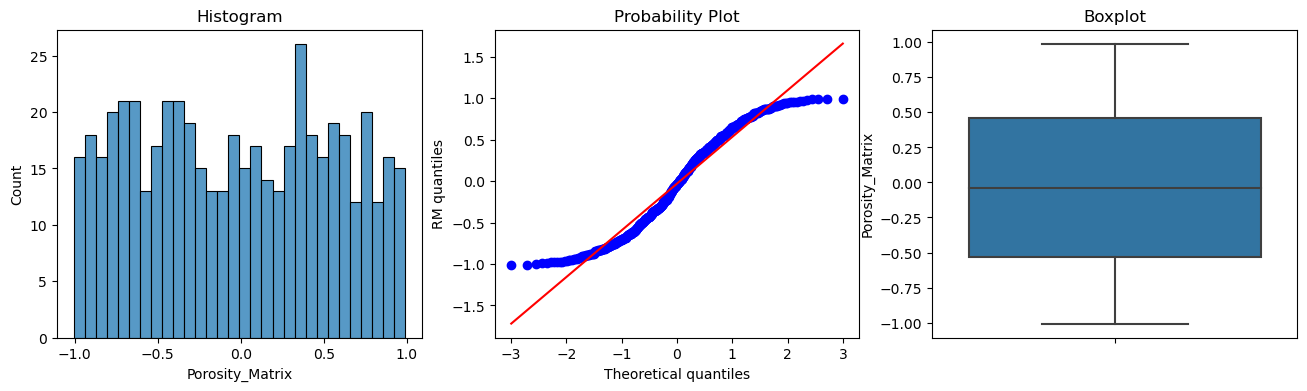

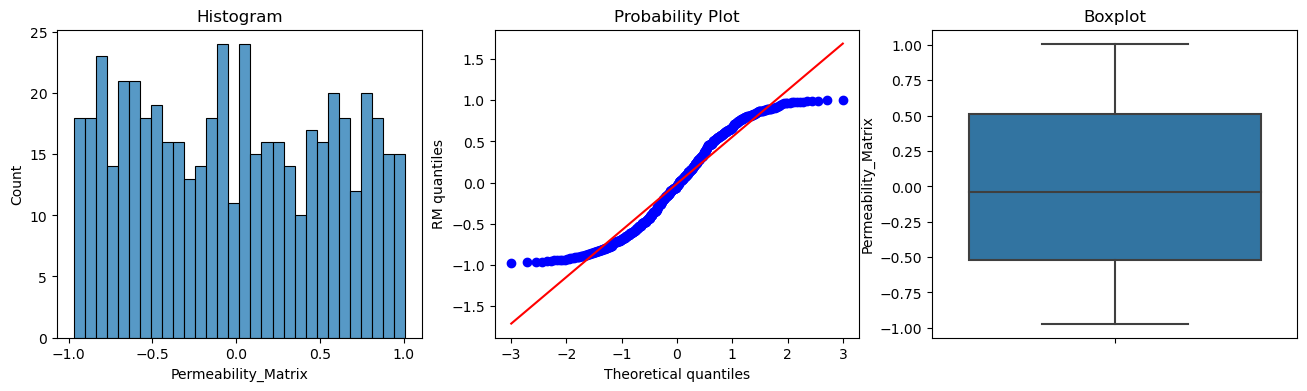

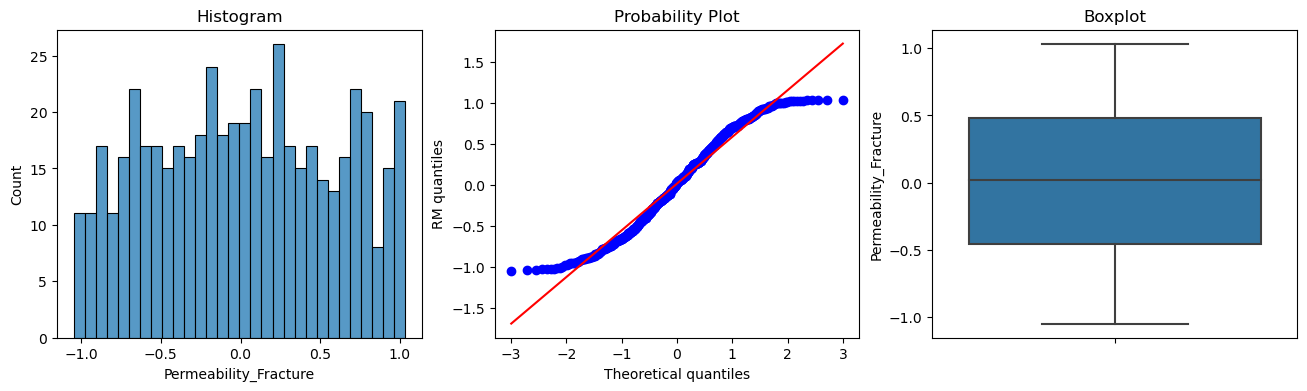

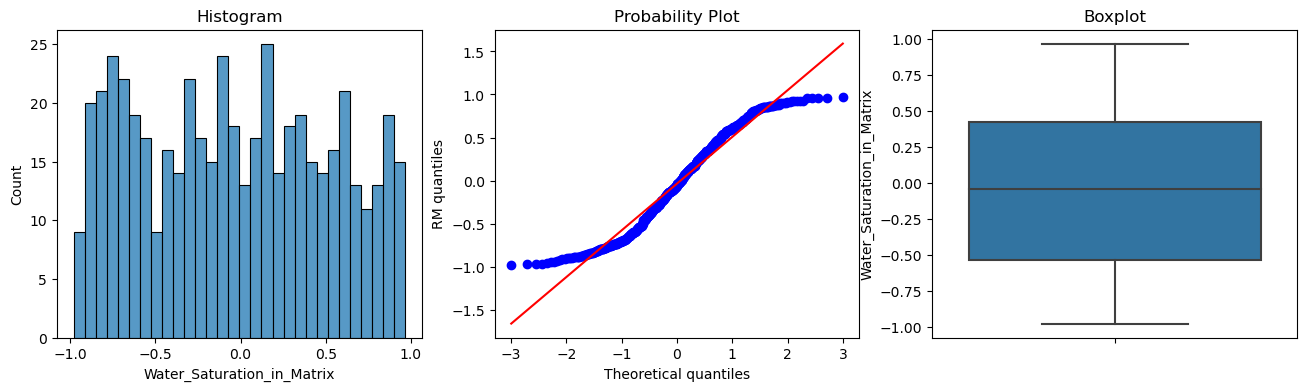

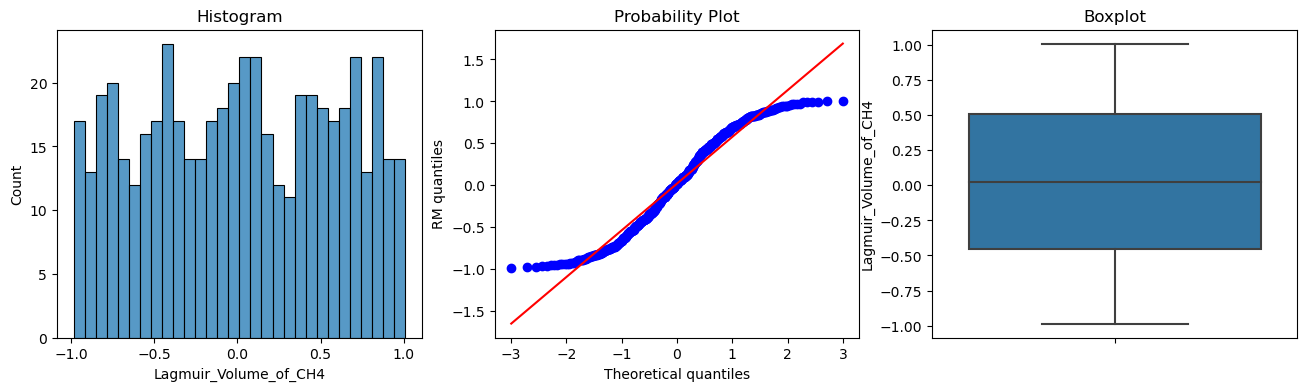

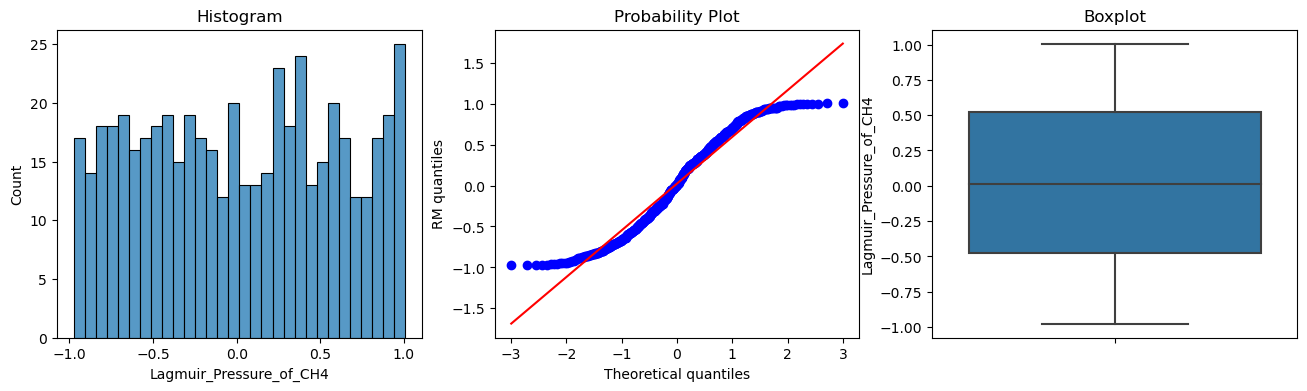

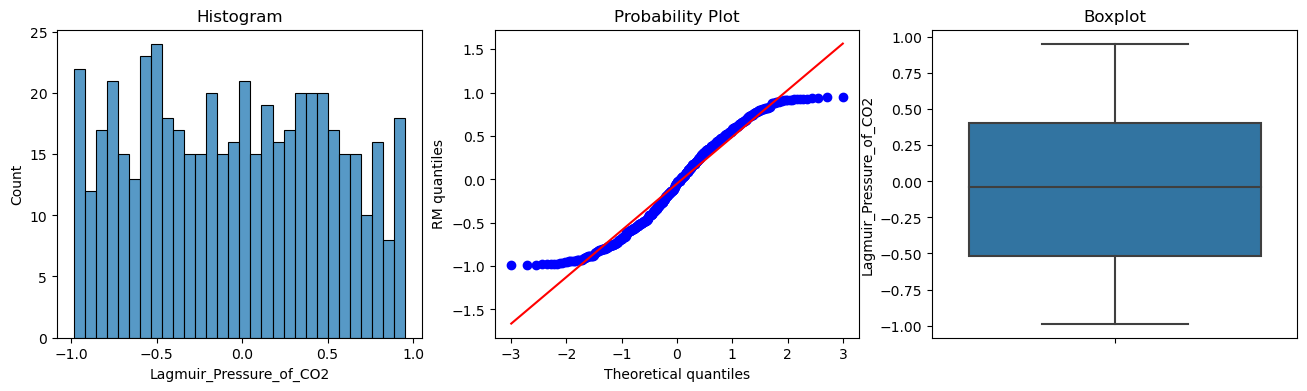

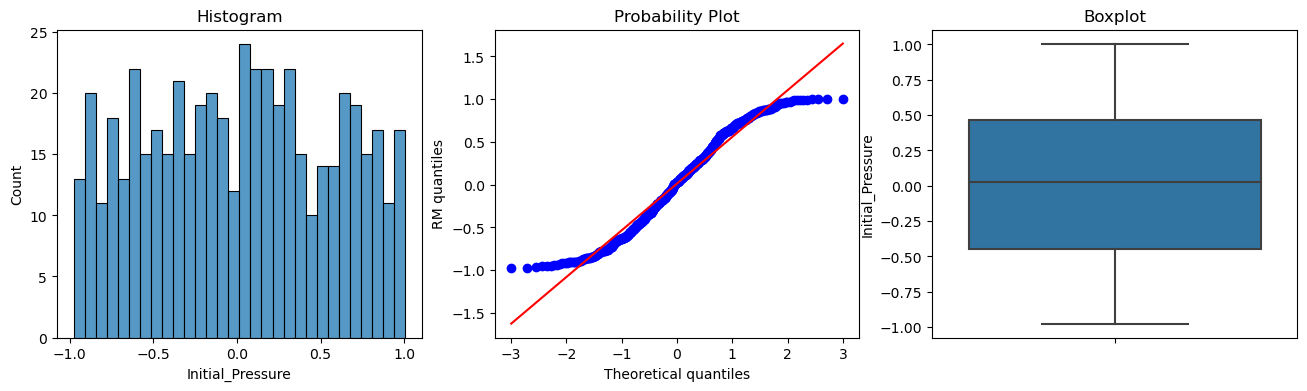

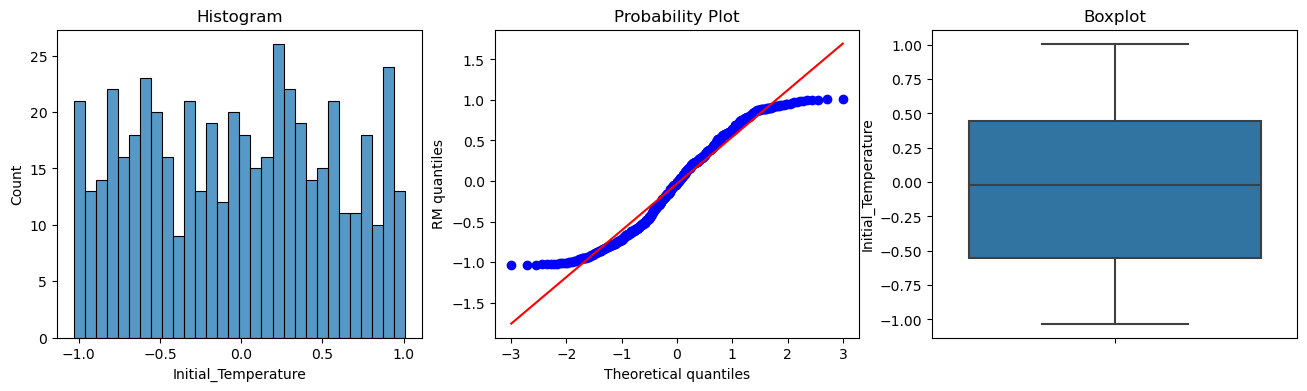

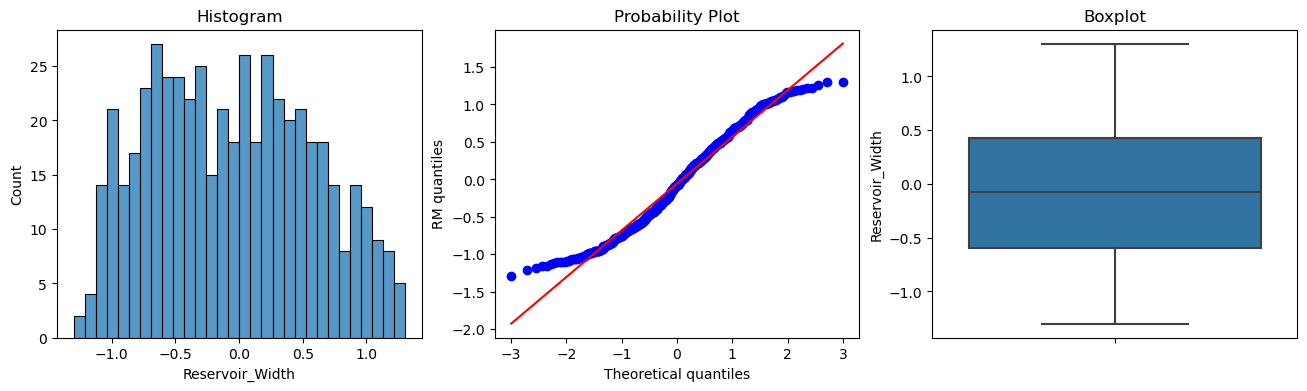

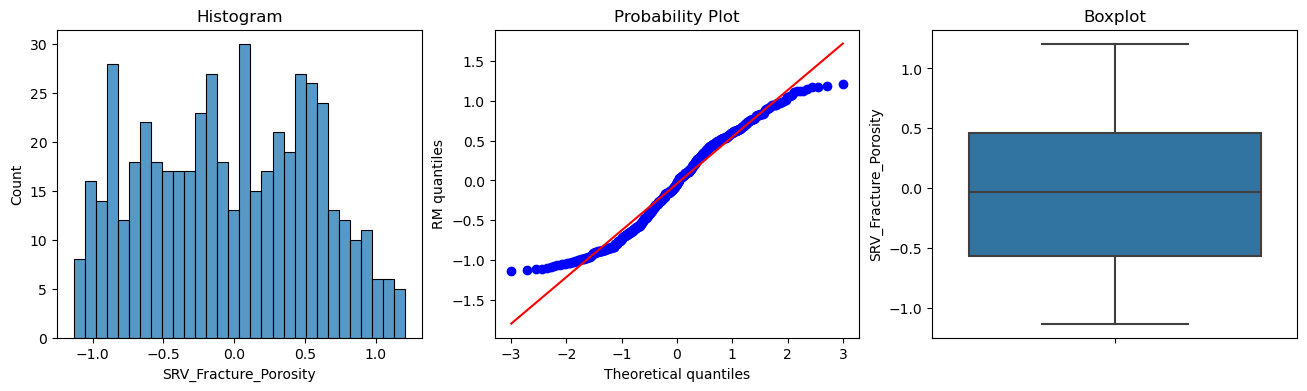

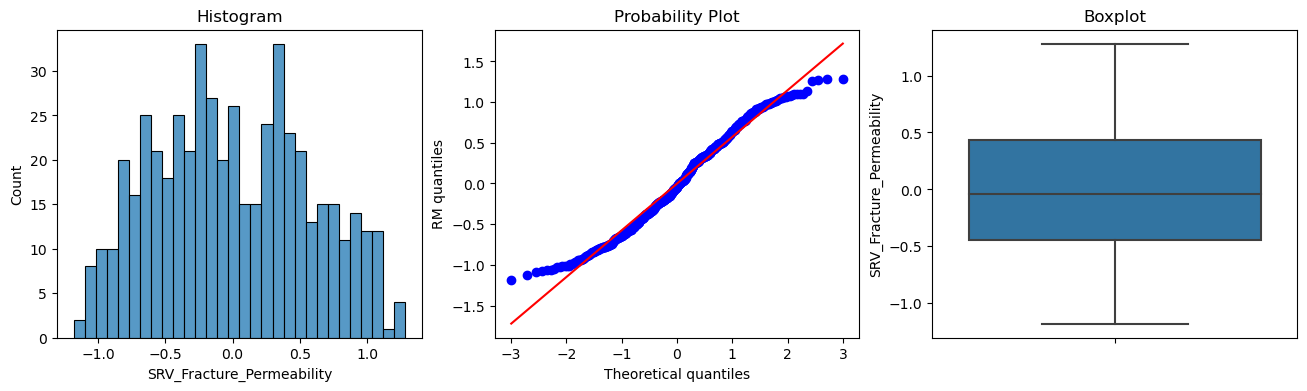

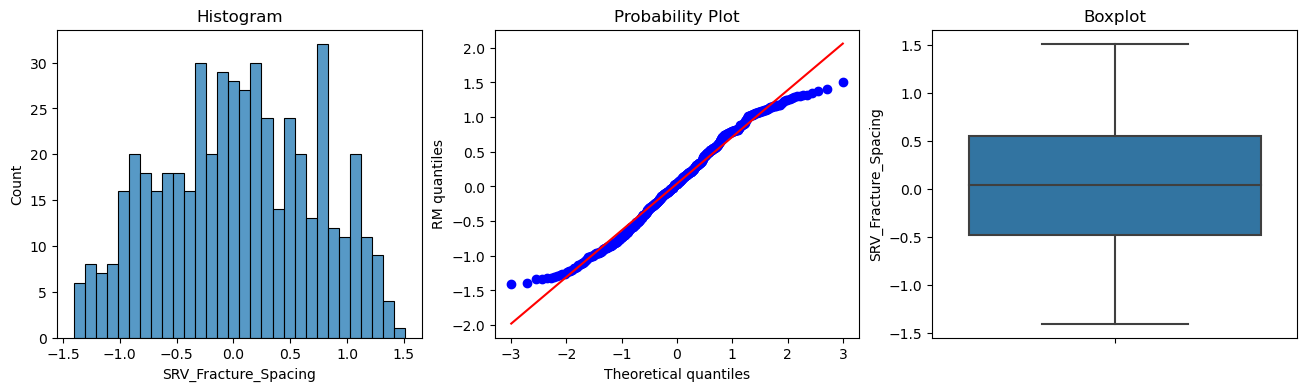

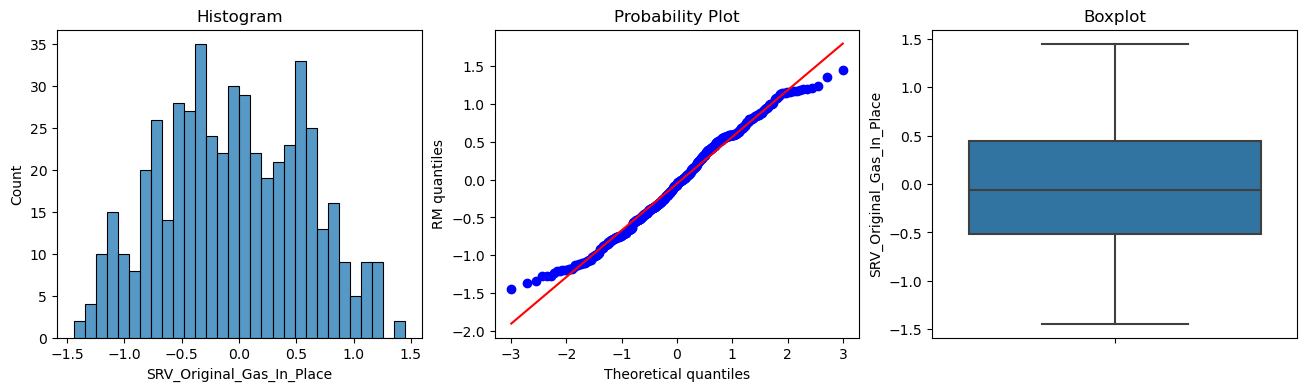

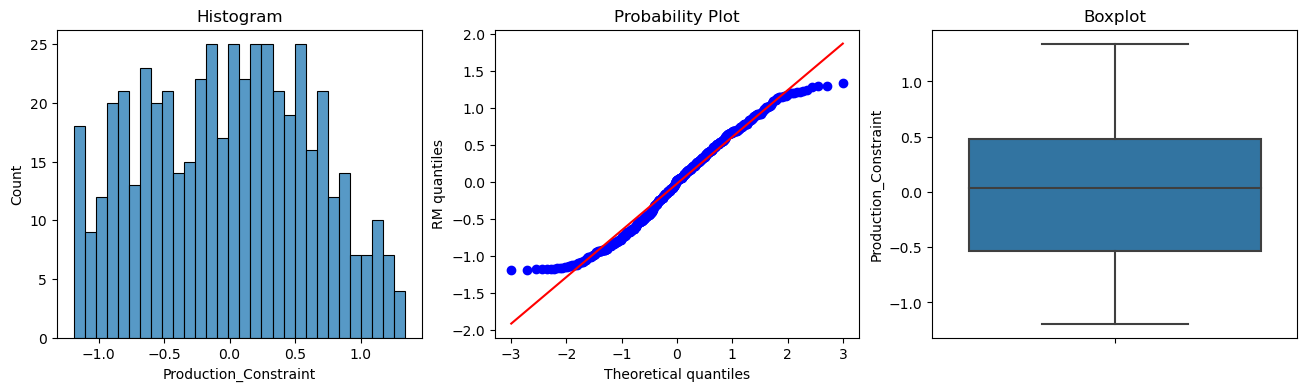

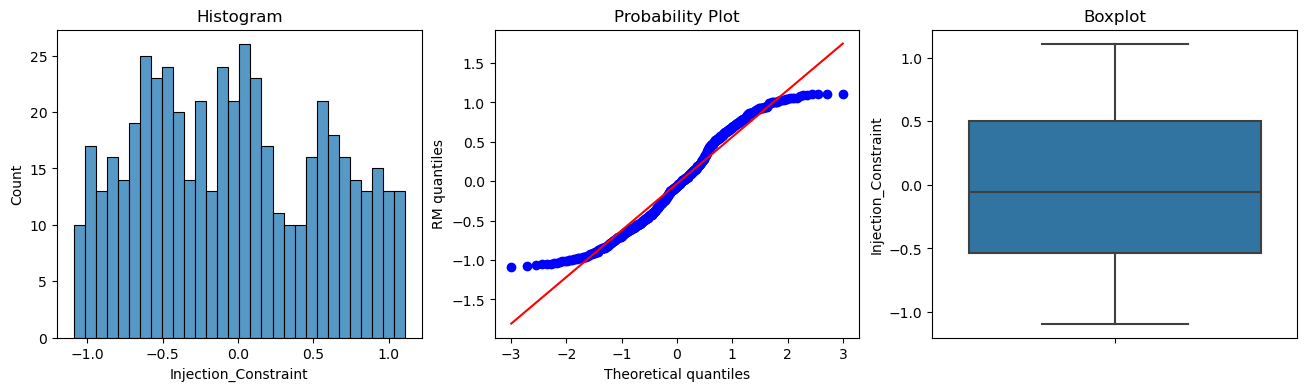

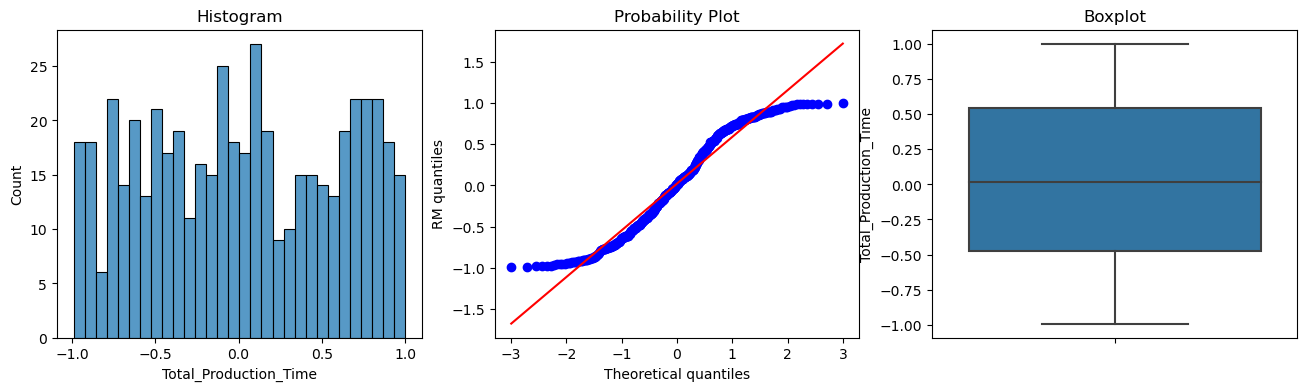

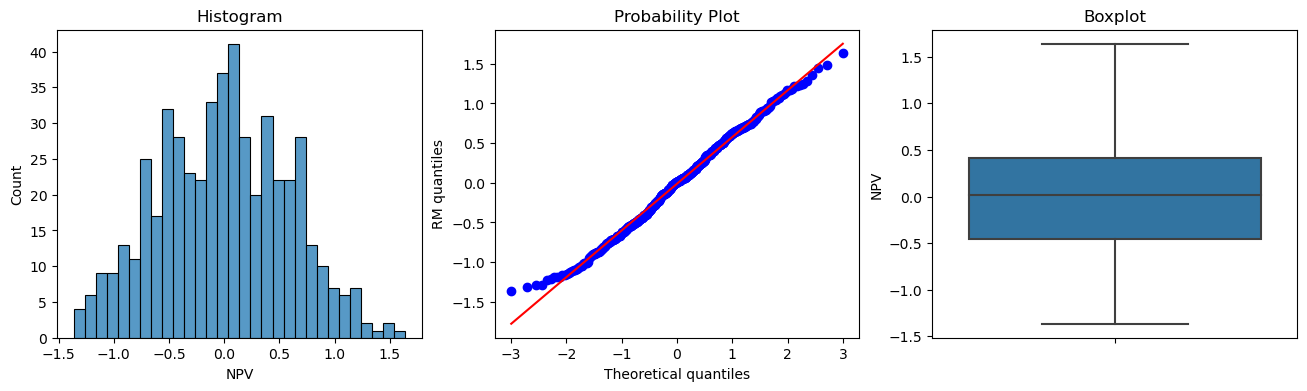

In [44]:
for i in test_data_transformed.columns:
    diagnostic_plots(test_data_transformed, i)

# 6. Model Generation

## 5.1 Linear Regression

In [45]:
x_train_lr=train_data_transformed.drop("NPV", axis=1)
y_train_lr=train_data_transformed["NPV"]
x_test_lr=test_data_transformed.drop("NPV", axis=1)
y_test_lr=test_data_transformed["NPV"]
from sklearn.linear_model import LinearRegression

#### According to the following scores, our model works well with very low overfitting

In [46]:
Mult_Reg=LinearRegression().fit(x_train_lr, y_train_lr)
Mult_Reg.score(x_train_lr, y_train_lr),Mult_Reg.score(x_test_lr, y_test_lr)

(0.9407236907968222, 0.9283620362135254)

#### Although there is very low overfitting, I applied L2 regularization (Ridge) to reduce variance

In [47]:
from sklearn.linear_model import Ridge
Ridge_reg=Ridge(alpha=60, max_iter=100, tol=0.1)
Ridge_reg.fit(x_train_lr, y_train_lr)
Ridge_reg.score(x_train_lr, y_train_lr),Ridge_reg.score(x_test_lr, y_test_lr)

(0.932011560729886, 0.9213387239663712)

In [48]:
y_predicted_test_lr = pd.DataFrame(Ridge_reg.predict(x_test_lr), columns=["NPV"])
y_predicted_train_lr = pd.DataFrame(Ridge_reg.predict(x_train_lr), columns=["NPV"])

##### I have used Mean Absolute Error, Mean Squared Error, R2 for test data, R2 for train data, R2 adjusted for test data

##### These values are based on scaled and transformed data. I have also applied the same metrics after inversely transforming the same data to their original values

In [49]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

MR_MAE = mean_absolute_error(y_test_lr, y_predicted_test_lr)
MR_MSE = mean_squared_error(y_test_lr,y_predicted_test_lr)
MR_R2 = r2_score(y_test_lr, y_predicted_test_lr)
MR_R2_train= r2_score(y_train_lr, y_predicted_train_lr)
MR_R2_adjusted = 1-(((1-MR_R2*MR_R2)*(len(y_test_lr)-1))/(len(y_test_lr-len(x_test_lr.columns)-1)))

Metrics1=pd.Series([MR_MAE,MR_MSE,MR_R2,MR_R2_train,MR_R2_adjusted], index=["MR_MAE","MR_MSE","MR_R2_test","MR_R2_train","MR_R2_test_adjusted"])
Metrics1

MR_MAE                 0.130313
MR_MSE                 0.027132
MR_R2_test             0.921339
MR_R2_train            0.932012
MR_R2_test_adjusted    0.849161
dtype: float64

##### Following cell inversely transforms our dataframes to get values in their original ranges

In [50]:
inverse_train_data_lr=pd.concat((x_train_lr,y_train_lr), axis=1)
inverse_test_data_lr=pd.concat((x_test_lr,y_test_lr), axis=1)
inverse_pr_train_data_lr=pd.concat((x_train_lr,y_predicted_train_lr), axis=1)
inverse_pr_test_data_lr=pd.concat((x_test_lr,y_predicted_test_lr), axis=1)


inverse_train_data_lr=transformer.inverse_transform(inverse_train_data_lr)
inverse_test_data_lr=transformer.inverse_transform(inverse_test_data_lr)
inverse_pr_train_data_lr=transformer.inverse_transform(inverse_pr_train_data_lr)
inverse_pr_test_data_lr=transformer.inverse_transform(inverse_pr_test_data_lr)

inverse_train_data_lr=scaler.inverse_transform(inverse_train_data_lr)
inverse_test_data_lr=scaler.inverse_transform(inverse_test_data_lr)
inverse_pr_train_data_lr=scaler.inverse_transform(inverse_pr_train_data_lr)
inverse_pr_test_data_lr=scaler.inverse_transform(inverse_pr_test_data_lr)

##### test_results_lr table shows results of test dataset. The third column is the error between actual NPV and predicted NPV values. 

In [51]:
test_results_lr=pd.DataFrame(inverse_test_data_lr[:,-1], columns=["y_test"])
test_results_lr["y_predicted_test"]=inverse_pr_test_data_lr[:,-1]
test_results_lr["Errors"]=test_results_lr["y_test"]-test_results_lr["y_predicted_test"]
test_results_lr

y_test  y_predicted_test    Errors
0    -7.679653         -8.137352  0.457699
1     3.980724          8.062039 -4.081315
2    -2.044797         -1.378063 -0.666734
3    10.901017          9.719465  1.181553
4    28.048130         18.590821  9.457309
..         ...               ...       ...
505  20.351234         21.630880 -1.279646
506  -0.855379         -2.140721  1.285342
507  23.854742         16.839829  7.014913
508  40.190457         39.538924  0.651534
509  -2.647619          0.975642 -3.623260

[510 rows x 3 columns]

##### train_results_lr table shows results of train dataset. The third column is the error between actual NPV and predicted NPV values. 

In [52]:
train_results_lr=pd.DataFrame(inverse_train_data_lr[:,-1], columns=["y_train"])
train_results_lr["y_predicted_train"]=inverse_pr_train_data_lr[:,-1]
train_results_lr["Errors"]=train_results_lr["y_train"]-train_results_lr["y_predicted_train"]
train_results_lr

y_train  y_predicted_train    Errors
0      2.029977           2.582965 -0.552988
1     -8.716109          -8.979686  0.263577
2    -10.321958          -8.002000 -2.319958
3     -0.585114          -3.947845  3.362731
4      3.447022           2.010331  1.436691
...         ...                ...       ...
2032  10.700431          15.356123 -4.655692
2033  -7.896831          -8.360740  0.463909
2034  -8.341661          -7.344865 -0.996797
2035 -17.797637         -12.445022 -5.352615
2036  12.482692           8.766171  3.716521

[2037 rows x 3 columns]

##### As you can results of the metrics are almost the same

In [53]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

MR_MAE = mean_absolute_error(test_results_lr["y_test"], test_results_lr["y_predicted_test"])
MR_MSE = mean_squared_error(test_results_lr["y_test"],test_results_lr["y_predicted_test"])
MR_R2 = r2_score(test_results_lr["y_test"], test_results_lr["y_predicted_test"])
MR_R2_train= r2_score(train_results_lr["y_train"], train_results_lr["y_predicted_train"])
MR_R2_adjusted = 1-(((1-MR_R2*MR_R2)*(len(test_results_lr["y_test"])-1))/(len(test_results_lr["y_test"]-len(x_test_lr.columns)-1)))

Metrics1=pd.Series([MR_MAE,MR_MSE,MR_R2,MR_R2_train,MR_R2_adjusted], index=["MR_MAE","MR_MSE","MR_R2_test","MR_R2_train","MR_R2_test_adjusted"])
Metrics1

MR_MAE                  3.176927
MR_MSE                 18.803372
MR_R2_test              0.915021
MR_R2_train             0.930885
MR_R2_test_adjusted     0.837582
dtype: float64

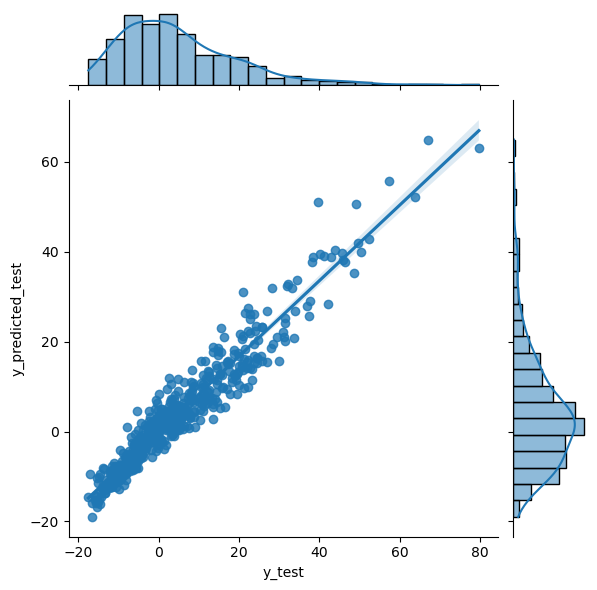

In [54]:
sns.jointplot(x='y_test',y='y_predicted_test',data=test_results_lr,kind='reg')

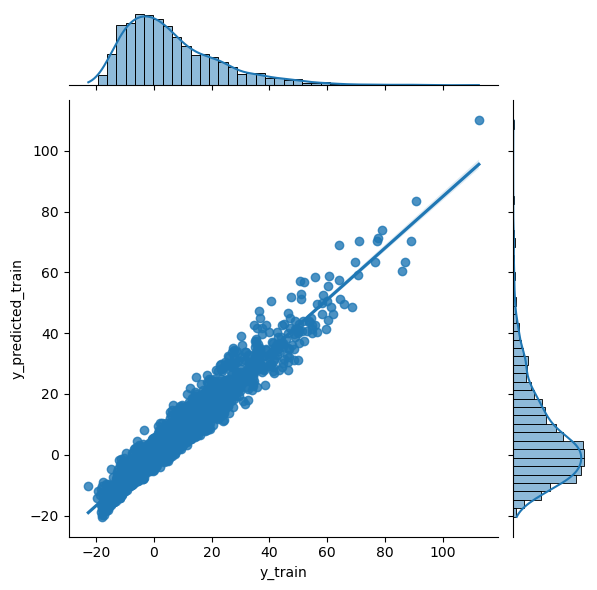

In [55]:
sns.jointplot(x='y_train',y='y_predicted_train',data=train_results_lr,kind='reg')

<AxesSubplot:xlabel='Errors', ylabel='Density'>

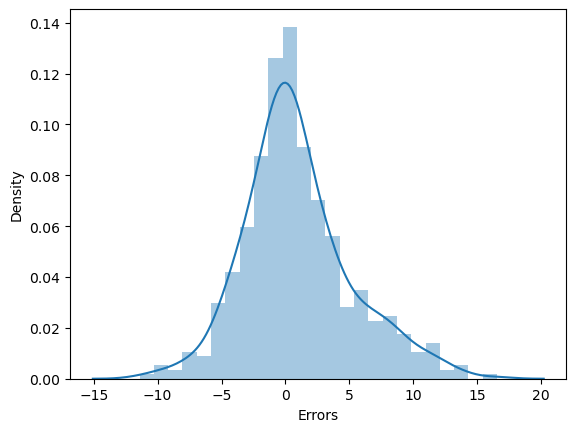

In [56]:
sns.distplot(test_results_lr["Errors"])

<AxesSubplot:xlabel='Errors', ylabel='Density'>

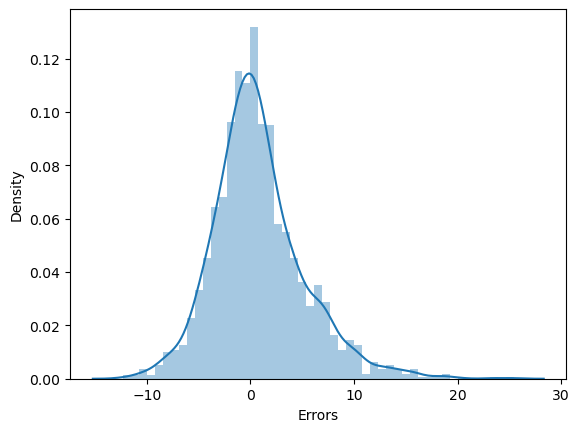

In [57]:
sns.distplot(train_results_lr["Errors"])

## 6.2 Random Forest

##### Since Random Forest is not effected by multicollinearity we can use all features in our model also without any feature scaling and data transformation

In [58]:
x_train_rf=x_train.copy()
y_train_rf=y_train.copy()
x_test_rf=x_test.copy()
y_test_rf=y_test.copy()

In [59]:
x_train_rf.shape,x_test_rf.shape

((2037, 27), (510, 27))

##### In our Random Forest Regressor model, 100 different decision trees were built

In [60]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(n_estimators=100)
RF.fit(x_train_rf,y_train_rf)

y_predicted_test_rf = pd.DataFrame(RF.predict(x_test_rf), columns=["NPV"])
y_predicted_train_rf = pd.DataFrame(RF.predict(x_train_rf), columns=["NPV"])

In [61]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

RF_MAE = mean_absolute_error(y_test_rf, y_predicted_test_rf)
RF_MSE = mean_squared_error(y_test_rf,y_predicted_test_rf)
RF_R2 = r2_score(y_test_rf, y_predicted_test_rf)
RF_R2_train= r2_score(y_train_rf, y_predicted_train_rf)
RF_R2_adjusted = 1-(((1-RF_R2*RF_R2)*(len(y_test_rf)-1))/(len(y_test_rf-len(x_test_rf.columns)-1)))

Metrics2=pd.Series([RF_MAE,RF_MSE,RF_R2,RF_R2_train,RF_R2_adjusted], index=["RF_MAE","RF_MSE","RF_R2_test","RF_R2_train","RF_R2_test_adjusted"])
Metrics2

RF_MAE                  3.488492
RF_MSE                 24.283235
RF_R2_test              0.890255
RF_R2_train             0.985674
RF_R2_test_adjusted     0.792961
dtype: float64

##### Following scores and visualization also proves the results that I obtained in the feature selection part

variable: SRV_Fracture_Permeability Importance: 0.39
variable: SRV_Original_Gas_In_Place Importance: 0.2
variable: Initial_Pressure     Importance: 0.13
variable: Production_Constraint Importance: 0.07
variable: Original_Gas_In_Place Importance: 0.06
variable: Horizontal_Wellbore_Length Importance: 0.03
variable: Reservoir_Width      Importance: 0.02
variable: Permeability_Fracture Importance: 0.01
variable: Injection_Constraint Importance: 0.01
variable: Fracture_Pressure    Importance: 0.01
variable: Thickness            Importance: 0.0
variable: Porosity_Matrix      Importance: 0.0
variable: Porosity_Fracture    Importance: 0.0
variable: Permeability_Matrix  Importance: 0.0
variable: Natural_Fracture_Spacing Importance: 0.0
variable: Water_Saturation_in_Matrix Importance: 0.0
variable: Lagmuir_Volume_of_CH4 Importance: 0.0
variable: Lagmuir_Pressure_of_CH4 Importance: 0.0
variable: Lagmuir_Volume_of_CO2 Importance: 0.0
variable: Lagmuir_Pressure_of_CO2 Importance: 0.0
variable: Init

Text(0.5, 0, 'Feature Importance')

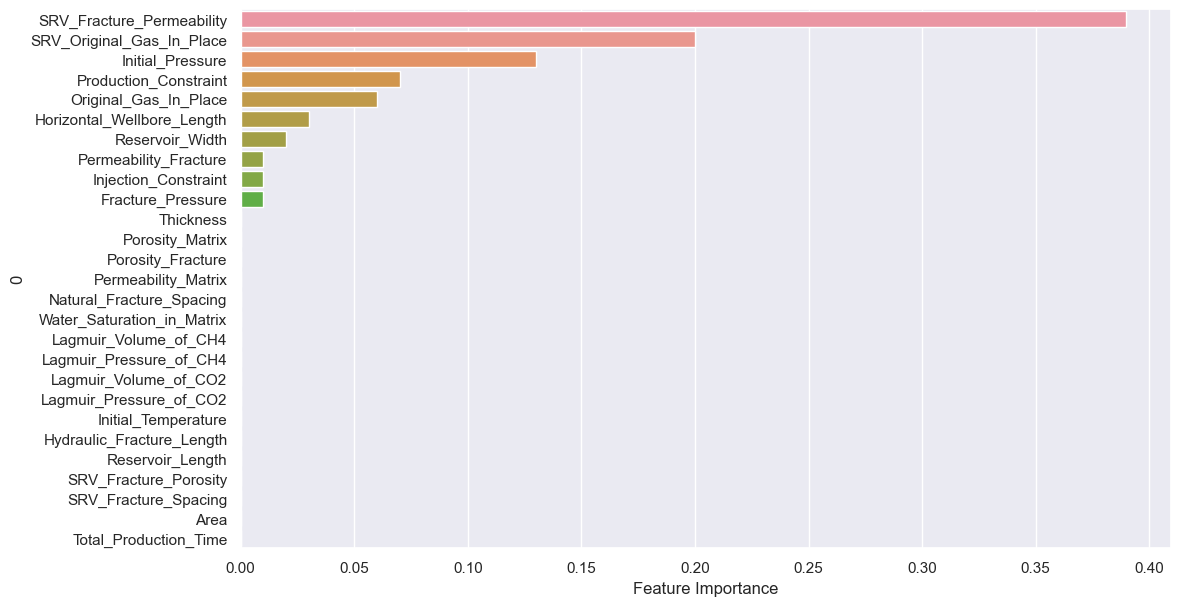

In [62]:
feature_list=list(x_train_rf.columns)
importances = list(RF.feature_importances_)
feature_importances=[(feature, round(importance,2)) for feature, importance in zip(feature_list, importances)]
feature_importances=sorted(feature_importances, key=lambda x:x[1], reverse=True)
[print("variable: {:20} Importance: {}".format(*pair)) for pair in feature_importances];

feature_importances=pd.DataFrame(feature_importances)
sns.set(rc = {'figure.figsize':(12,7)})
sns.barplot(x=feature_importances[1], y=feature_importances[0])
plt.xlabel("Feature Importance")

##### test_results_rf table shows results of test dataset. The third column is the difference between actual and predicted values. 

In [63]:
test_results_rf=pd.DataFrame(y_test_rf.values, columns=["y_test"])
test_results_rf["y_predicted_test"]=y_predicted_test_rf
test_results_rf["Errors"]=test_results_rf["y_test"]-test_results_rf["y_predicted_test"]
test_results_rf

y_test  y_predicted_test     Errors
0    -7.679653         -9.294873   1.615220
1     3.980724         12.705005  -8.724281
2    -2.044797         -1.684540  -0.360257
3    10.901017          1.774624   9.126394
4    28.048130         16.786189  11.261941
..         ...               ...        ...
505  20.351234         24.469837  -4.118603
506  -0.855379         -1.045727   0.190348
507  23.854742         23.463242   0.391500
508  40.190457         38.193407   1.997051
509  -2.647619         -5.433795   2.786176

[510 rows x 3 columns]

##### train_results_rf table shows results of train dataset. The third column is the difference between actual and predicted values. 

In [64]:
train_results_rf=pd.DataFrame(y_train_rf.values, columns=["y_train"])
train_results_rf["y_predicted_train"]=y_predicted_train_rf
train_results_rf["Errors"]=train_results_rf["y_train"]-train_results_rf["y_predicted_train"]
train_results_rf

y_train  y_predicted_train    Errors
0      2.029977           2.280842 -0.250865
1     -8.716109          -8.945320  0.229211
2    -10.321958          -9.472316 -0.849642
3     -0.585114          -0.616793  0.031679
4      3.447022           3.465594 -0.018573
...         ...                ...       ...
2032  10.700431          13.299617 -2.599185
2033  -7.896831          -6.888152 -1.008679
2034  -8.341661          -6.082829 -2.258833
2035 -17.797637         -16.213190 -1.584447
2036  12.482692          10.863832  1.618861

[2037 rows x 3 columns]

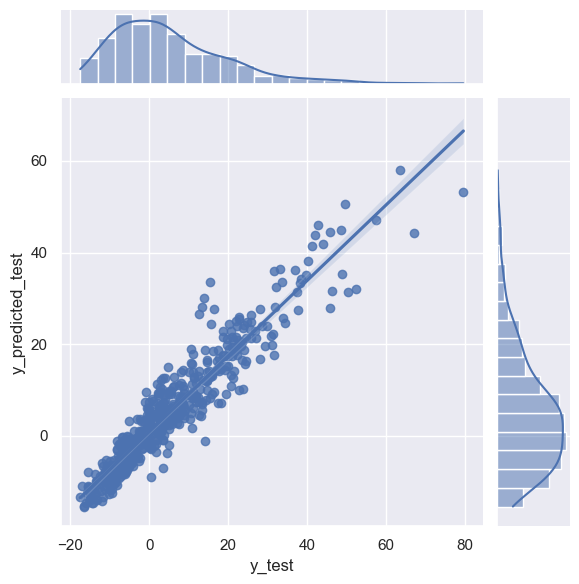

In [65]:
sns.jointplot(x='y_test',y='y_predicted_test',data=test_results_rf,kind='reg')

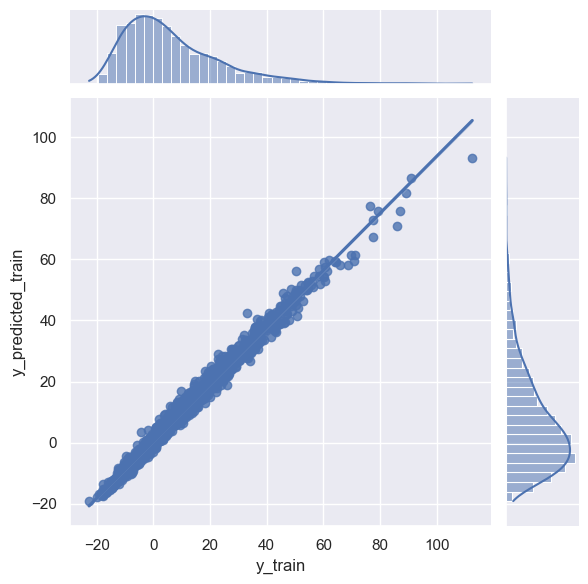

In [66]:
sns.jointplot(x='y_train',y='y_predicted_train',data=train_results_rf,kind='reg')

<AxesSubplot:xlabel='Errors', ylabel='Density'>

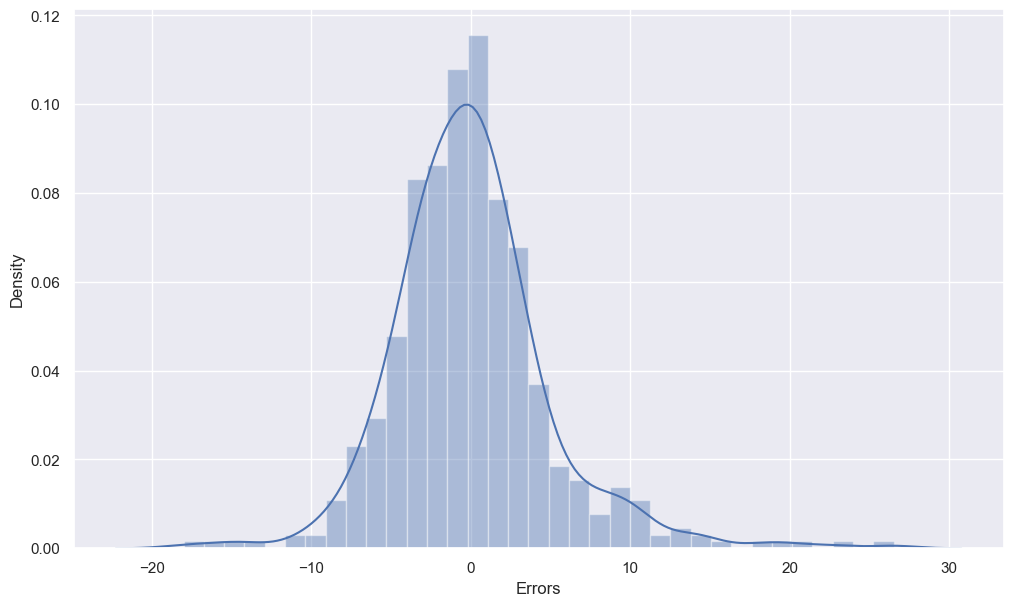

In [67]:
sns.distplot(test_results_rf["Errors"])

<AxesSubplot:xlabel='Errors', ylabel='Density'>

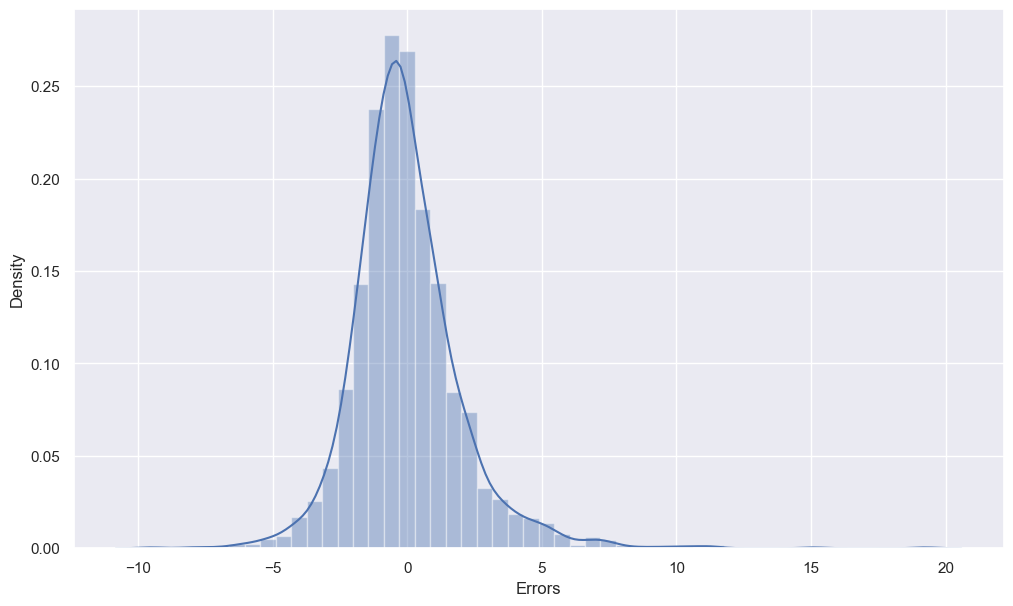

In [68]:
sns.distplot(train_results_rf["Errors"])

## 6.3 Neural Network

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.activations import relu

##### Since neural network model is also negatively affected by multicollinearity and different range of features, I used the same scaled and transformed data that I used for Linear Regression model, to build a neural network model

In [70]:
x_train_nn=x_train_lr.copy()
y_train_nn=y_train_lr.copy()
x_test_nn=x_test_lr.copy()
y_test_nn=y_test_lr.copy()

In [71]:
model = Sequential()

model.add(Dense(27, activation="relu"))
model.add(Dense(14, activation="relu"))
model.add(Dense(7, activation="relu"))
model.add(Dense(4, activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [72]:
history = model.fit(x=x_train_nn, y=y_train_nn, 
          validation_data=(x_test_nn, y_test_nn), 
          batch_size=128,
          epochs=200)

Epoch 1/200
16/16 [==============================] - 1s 14ms/step - loss: 0.4120 - val_loss: 0.3356
Epoch 2/200
16/16 [==============================] - 0s 4ms/step - loss: 0.3903 - val_loss: 0.3161
Epoch 3/200
16/16 [==============================] - 0s 4ms/step - loss: 0.3608 - val_loss: 0.2857
Epoch 4/200
16/16 [==============================] - 0s 3ms/step - loss: 0.3151 - val_loss: 0.2410
Epoch 5/200
16/16 [==============================] - 0s 5ms/step - loss: 0.2513 - val_loss: 0.1862
Epoch 6/200
16/16 [==============================] - 0s 5ms/step - loss: 0.1837 - val_loss: 0.1401
Epoch 7/200
16/16 [==============================] - 0s 4ms/step - loss: 0.1319 - val_loss: 0.1074
Epoch 8/200
16/16 [==============================] - 0s 5ms/step - loss: 0.1000 - val_loss: 0.0861
Epoch 9/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0779 - val_loss: 0.0691
Epoch 10/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0603 - val_loss: 0.0550
Epoch 11

16/16 [==============================] - 0s 5ms/step - loss: 0.0089 - val_loss: 0.0140
Epoch 84/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0089 - val_loss: 0.0140
Epoch 85/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0088 - val_loss: 0.0140
Epoch 86/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0088 - val_loss: 0.0139
Epoch 87/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0088 - val_loss: 0.0141
Epoch 88/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0088 - val_loss: 0.0144
Epoch 89/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0087 - val_loss: 0.0138
Epoch 90/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0086 - val_loss: 0.0141
Epoch 91/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0085 - val_loss: 0.0139
Epoch 92/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0085 - val_loss: 0.0140
Epoch 93/200


##### The following plots shows change of loss and validation loss after each epoch

<AxesSubplot:>

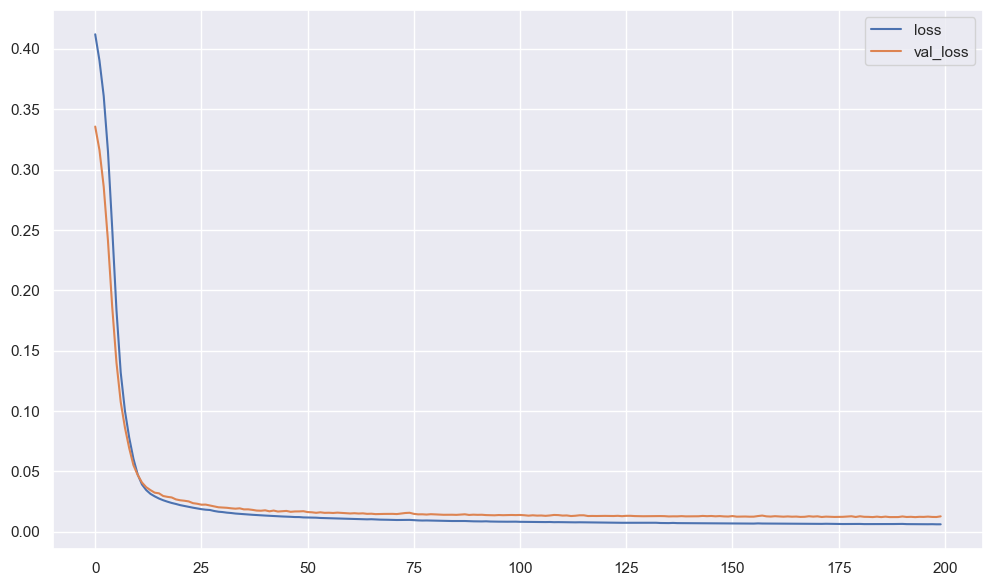

In [73]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [74]:
y_predicted_test_nn= pd.DataFrame(model.predict(x_test_nn), columns=["NPV"])
y_predicted_train_nn= pd.DataFrame(model.predict(x_train_nn), columns=["NPV"])

64/64 [==============================] - 0s 941us/step


##### These values are based on scaled and transformed data. I have also applied the same metrics after inversely transforming the same data to their original values

In [75]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

NN_MAE = mean_absolute_error(y_test_nn, y_predicted_test_nn)
NN_MSE = mean_squared_error(y_test_nn,y_predicted_test_nn)
NN_R2 = r2_score(y_test_nn, y_predicted_test_nn)
NN_R2_train= r2_score(y_train_nn, y_predicted_train_nn)
NN_R2_adjusted = 1-(((1-NN_R2*NN_R2)*(len(y_test_nn)-1))/(len(y_test_nn-len(x_test_nn.columns)-1)))

Metrics3=pd.Series([NN_MAE,NN_MSE,NN_R2,NN_R2_train,NN_R2_adjusted], index=["NN_MAE","NN_MSE","NN_R2_test","NN_R2_train","NN_R2_test_adjusted"])
Metrics3

NN_MAE                 0.089880
NN_MSE                 0.012675
NN_R2_test             0.963252
NN_R2_train            0.985531
NN_R2_test_adjusted    0.927997
dtype: float64

##### Following cell inversely transforms our dataframes to get values in their original ranges

In [76]:
inverse_train_data_nn=pd.concat((x_train_nn,y_train_nn), axis=1)
inverse_test_data_nn=pd.concat((x_test_nn,y_test_nn), axis=1)
inverse_pr_train_data_nn=pd.concat((x_train_nn,y_predicted_train_nn), axis=1)
inverse_pr_test_data_nn=pd.concat((x_test_nn,y_predicted_test_nn), axis=1)


inverse_train_data_nn=transformer.inverse_transform(inverse_train_data_nn)
inverse_test_data_nn=transformer.inverse_transform(inverse_test_data_nn)
inverse_pr_train_data_nn=transformer.inverse_transform(inverse_pr_train_data_nn)
inverse_pr_test_data_nn=transformer.inverse_transform(inverse_pr_test_data_nn)

inverse_train_data_nn=scaler.inverse_transform(inverse_train_data_nn)
inverse_test_data_nn=scaler.inverse_transform(inverse_test_data_nn)
inverse_pr_train_data_nn=scaler.inverse_transform(inverse_pr_train_data_nn)
inverse_pr_test_data_nn=scaler.inverse_transform(inverse_pr_test_data_nn)

##### test_results_rf table shows results of test dataset. The third column is the difference between actual and predicted values. 

In [77]:
test_results_nn=pd.DataFrame(inverse_test_data_nn[:,-1], columns=["y_test"])
test_results_nn["y_predicted_test"]=inverse_pr_test_data_nn[:,-1]
test_results_nn["Errors"]=test_results_nn["y_test"]-test_results_nn["y_predicted_test"]
test_results_nn

y_test  y_predicted_test    Errors
0    -7.679653         -8.632010  0.952357
1     3.980724          7.245026 -3.264302
2    -2.044797         -3.013883  0.969085
3    10.901017         11.409250 -0.508232
4    28.048130         23.765456  4.282674
..         ...               ...       ...
505  20.351234         19.617394  0.733839
506  -0.855379         -2.310613  1.455234
507  23.854742         26.112525 -2.257783
508  40.190457         39.401689  0.788768
509  -2.647619         -2.085590 -0.562029

[510 rows x 3 columns]

##### train_results_nn table shows results of train dataset. The third column is the difference between actual and predicted values. 

In [78]:
train_results_nn=pd.DataFrame(inverse_train_data_nn[:,-1], columns=["y_train"])
train_results_nn["y_predicted_train"]=inverse_pr_train_data_nn[:,-1]
train_results_nn["Errors"]=train_results_nn["y_train"]-train_results_nn["y_predicted_train"]
train_results_nn

y_train  y_predicted_train    Errors
0      2.029977           1.269636  0.760341
1     -8.716109          -7.822492 -0.893617
2    -10.321958         -10.059930 -0.262028
3     -0.585114          -1.311398  0.726284
4      3.447022          -0.000574  3.447595
...         ...                ...       ...
2032  10.700431           9.483657  1.216774
2033  -7.896831          -8.645323  0.748493
2034  -8.341661          -5.344100 -2.997561
2035 -17.797637         -17.222884 -0.574753
2036  12.482692          10.688398  1.794294

[2037 rows x 3 columns]

##### As you can see values are almost the same with the above metrics scores

In [79]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

MR_MAE = mean_absolute_error(test_results_nn["y_test"], test_results_nn["y_predicted_test"])
MR_MSE = mean_squared_error(test_results_nn["y_test"],test_results_nn["y_predicted_test"])
MR_R2 = r2_score(test_results_nn["y_test"], test_results_nn["y_predicted_test"])
MR_R2_train= r2_score(train_results_nn["y_train"], train_results_nn["y_predicted_train"])
MR_R2_adjusted = 1-(((1-MR_R2*MR_R2)*(len(test_results_nn["y_test"])-1))/(len(test_results_nn["y_test"]-len(x_test_nn.columns)-1)))

Metrics1=pd.Series([MR_MAE,MR_MSE,MR_R2,MR_R2_train,MR_R2_adjusted], index=["MR_MAE","MR_MSE","MR_R2_test","MR_R2_train","MR_R2_test_adjusted"])
Metrics1

MR_MAE                 2.100647
MR_MSE                 7.843875
MR_R2_test             0.964551
MR_R2_train            0.983054
MR_R2_test_adjusted    0.930495
dtype: float64

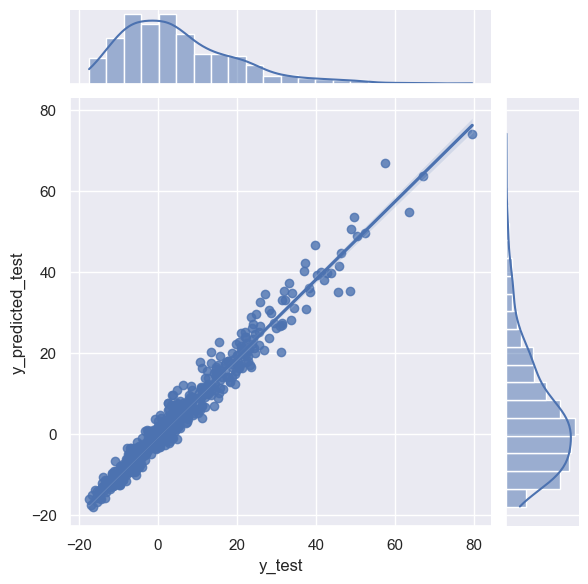

In [80]:
sns.jointplot(x='y_test',y='y_predicted_test',data=test_results_nn,kind='reg')

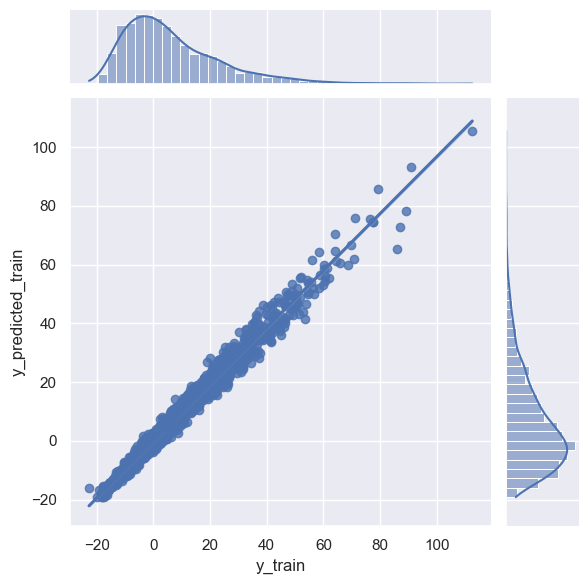

In [81]:
sns.jointplot(x='y_train',y='y_predicted_train',data=train_results_nn,kind='reg')

<AxesSubplot:xlabel='Errors', ylabel='Density'>

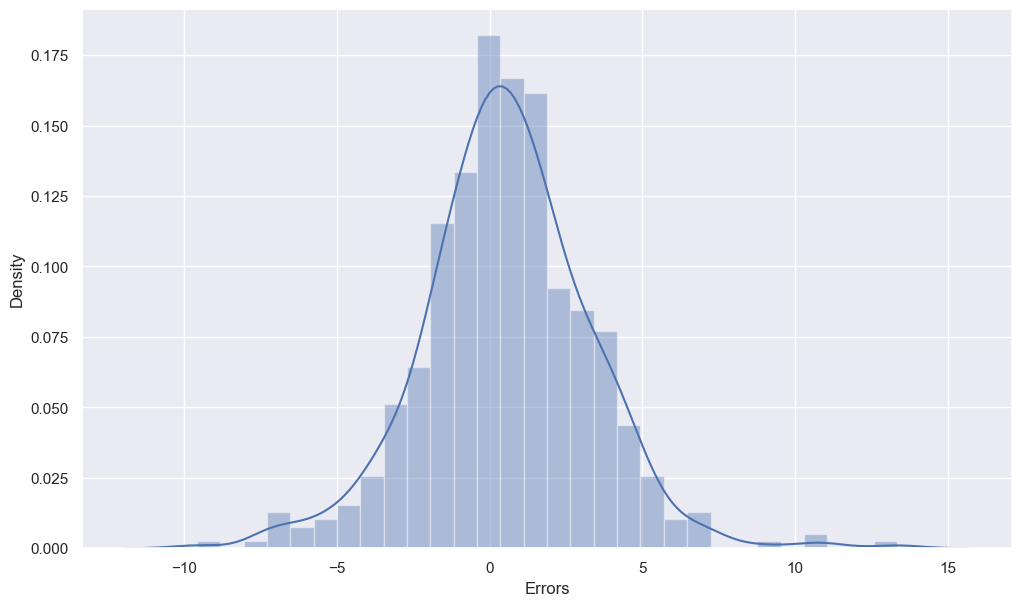

In [82]:
sns.distplot(test_results_nn["Errors"])

<AxesSubplot:xlabel='Errors', ylabel='Density'>

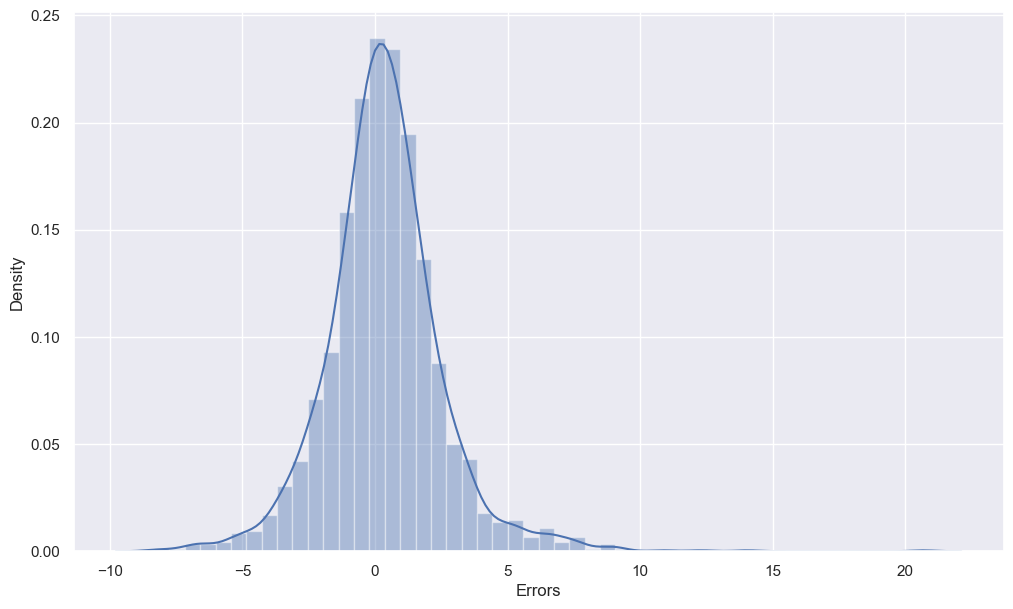

In [83]:
sns.distplot(train_results_nn["Errors"])